In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/JPY_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222740, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,108.730,108.751,108.715,108.751
2020-01-01 17:05:00,108.759,108.738,108.736,108.759
2020-01-01 17:10:00,108.738,108.728,108.590,108.750
2020-01-01 17:15:00,108.728,108.677,108.575,108.735
2020-01-01 17:20:00,108.679,108.686,108.679,108.694


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222739, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,108.730,108.751,108.715,108.751,108.738,17,2,1,-0.021,108.7330,0.036,108.73675
2020-01-01 17:05:00,108.759,108.738,108.736,108.759,108.728,17,2,1,0.021,108.7475,0.023,108.74800
2020-01-01 17:10:00,108.738,108.728,108.590,108.750,108.677,17,2,1,0.010,108.6700,0.160,108.70150
2020-01-01 17:15:00,108.728,108.677,108.575,108.735,108.686,17,2,1,0.051,108.6550,0.160,108.67875
2020-01-01 17:20:00,108.679,108.686,108.679,108.694,108.703,17,2,1,-0.007,108.6865,0.015,108.68450


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,108.730,108.751,108.715,108.751,108.738,17,2,1,-0.021,108.7330,0.036,108.73675,-22.264383
2020-01-01 17:05:00,108.759,108.738,108.736,108.759,108.728,17,2,1,0.021,108.7475,0.023,108.74800,-22.239271
2020-01-01 17:10:00,108.738,108.728,108.590,108.750,108.677,17,2,1,0.010,108.6700,0.160,108.70150,-22.374533
2020-01-01 17:15:00,108.728,108.677,108.575,108.735,108.686,17,2,1,0.051,108.6550,0.160,108.67875,-22.419399
2020-01-01 17:20:00,108.679,108.686,108.679,108.694,108.703,17,2,1,-0.007,108.6865,0.015,108.68450,-22.390562


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  108.730  108.715  108.751         108.738    17    2   
2020-01-01 17:05:00  108.759  108.736  108.759         108.728    17    2   
2020-01-01 17:10:00  108.738  108.590  108.750         108.677    17    2   
2020-01-01 17:15:00  108.728  108.575  108.735         108.686    17    2   
2020-01-01 17:20:00  108.679  108.679  108.694         108.703    17    2   

                     week  momentum  avg_price  range  ohlc_price        pca  
timestamp                                                                     
2020-01-01 17:00:00     1    -0.021   108.7330  0.036   108.73675 -22.264383  
2020-01-01 17:05:00     1     0.021   108.7475  0.023   108.74800 -22.239271  
2020-01-01 17:10:00     1     0.010   108.6700  0.160   108.70150 -22.374533  
2020-01-01 17:15:00     1     0.051   108.6550  0.160   108.67875

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_5Min(X,y)

178191
178191
22000
22000
22548
22548


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(178191, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(178166, 24, 12)
(21975, 24, 12)
(22523, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(178166, 1)
(21975, 1)
(22523, 1)


array([[0.24513888],
       [0.24537253],
       [0.24533916],
       ...,
       [0.8828335 ],
       [0.8822999 ],
       [0.8840008 ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.24513888, 0.24537253, 0.24533916, ..., 0.8828335 , 0.8822999 ,
       0.8840008 ], dtype=float32)

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          197632    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY15min_CNN_BiLSTM.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 199.1206 - mae: 1.5986 - mse: 199.1206 - root_mean_squared_error: 14.1110 - mape: 1295.5325
Epoch 1: val_mse improved from inf to 0.00085, saving model to /content/drive/MyDrive/modelweights/JPY15min_CNN_BiLSTM.hdf5
463/463 [==============================] - 249s 524ms/step - loss: 199.1206 - mae: 1.5986 - mse: 199.1206 - root_mean_squared_error: 14.1110 - mape: 1295.5325 - val_loss: 8.4757e-04 - val_mae: 0.0237 - val_mse: 8.4757e-04 - val_root_mean_squared_error: 0.0291 - val_mape: 4355.1924
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 9.0606e-04 - mae: 0.0227 - mse: 9.0606e-04 - root_mean_squared_error: 0.0301 - mape: 523.3266
Epoch 2: val_mse did not improve from 0.00085
463/463 [==============================] - 235s 508ms/step - loss: 9.0606e-04 - mae: 0.0227 - mse: 9.0606e-04 - root_mean_squared_error: 0.0301 - mape: 523.3266 - val_loss: 0.0010 - val_mae: 0.0286 - val_mse: 0.0010 - val_

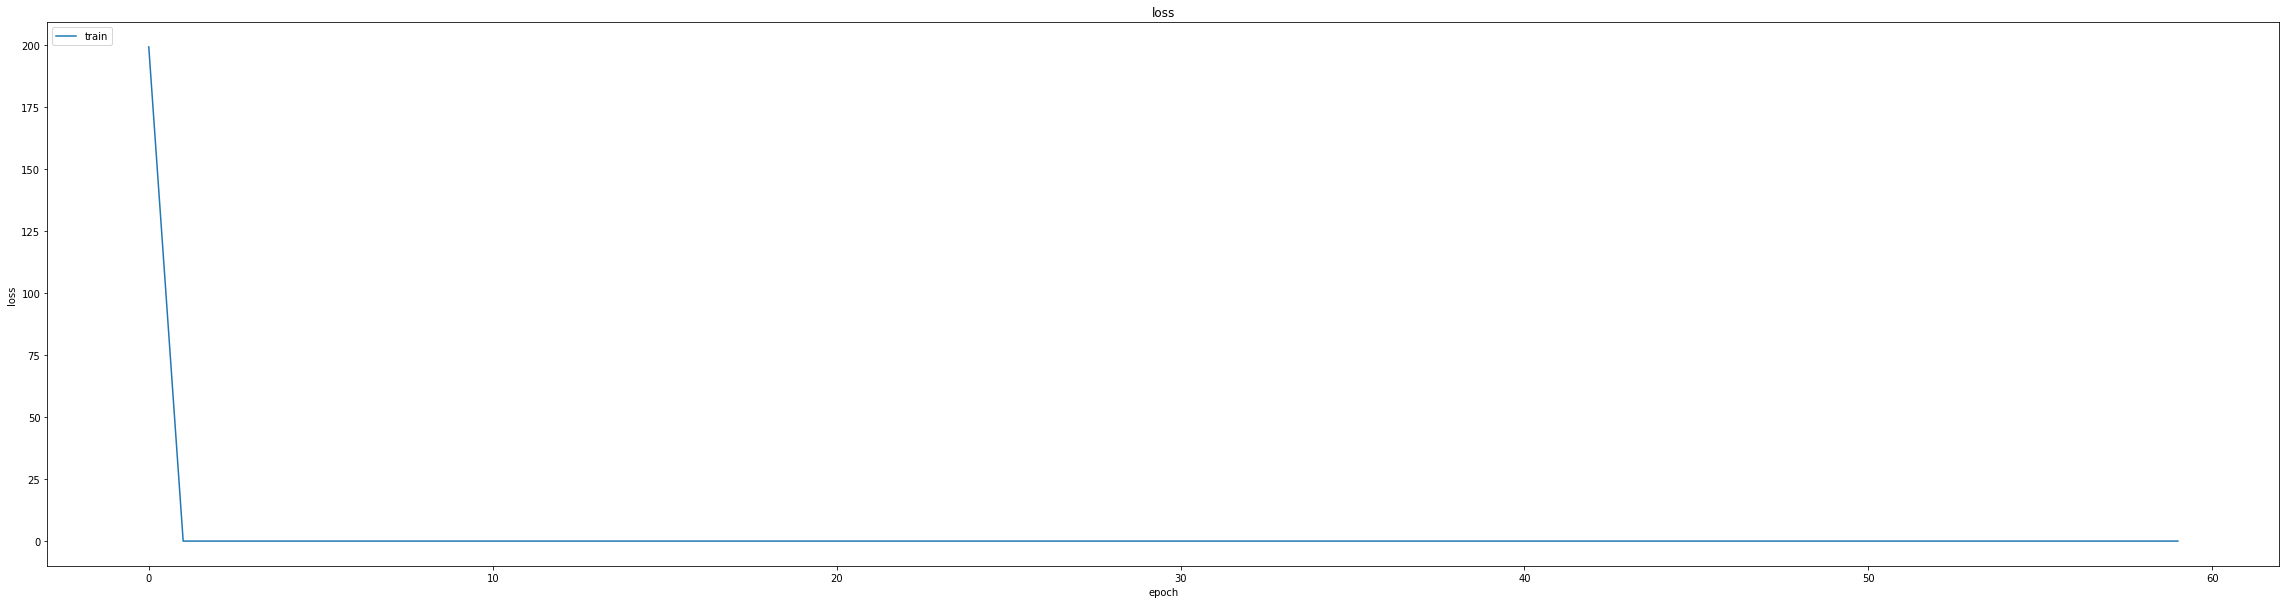

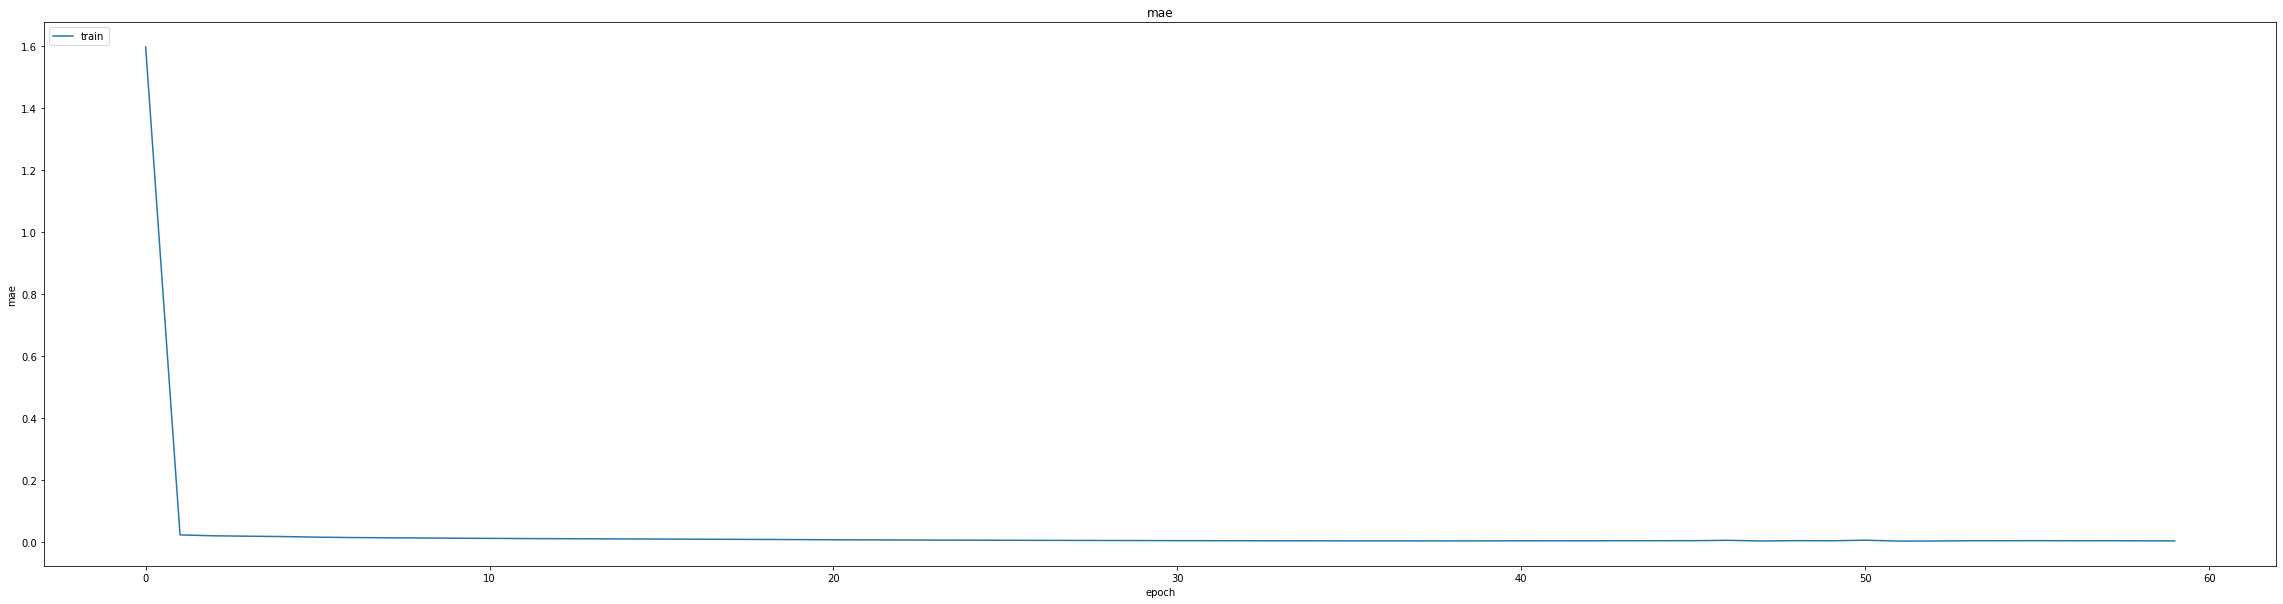

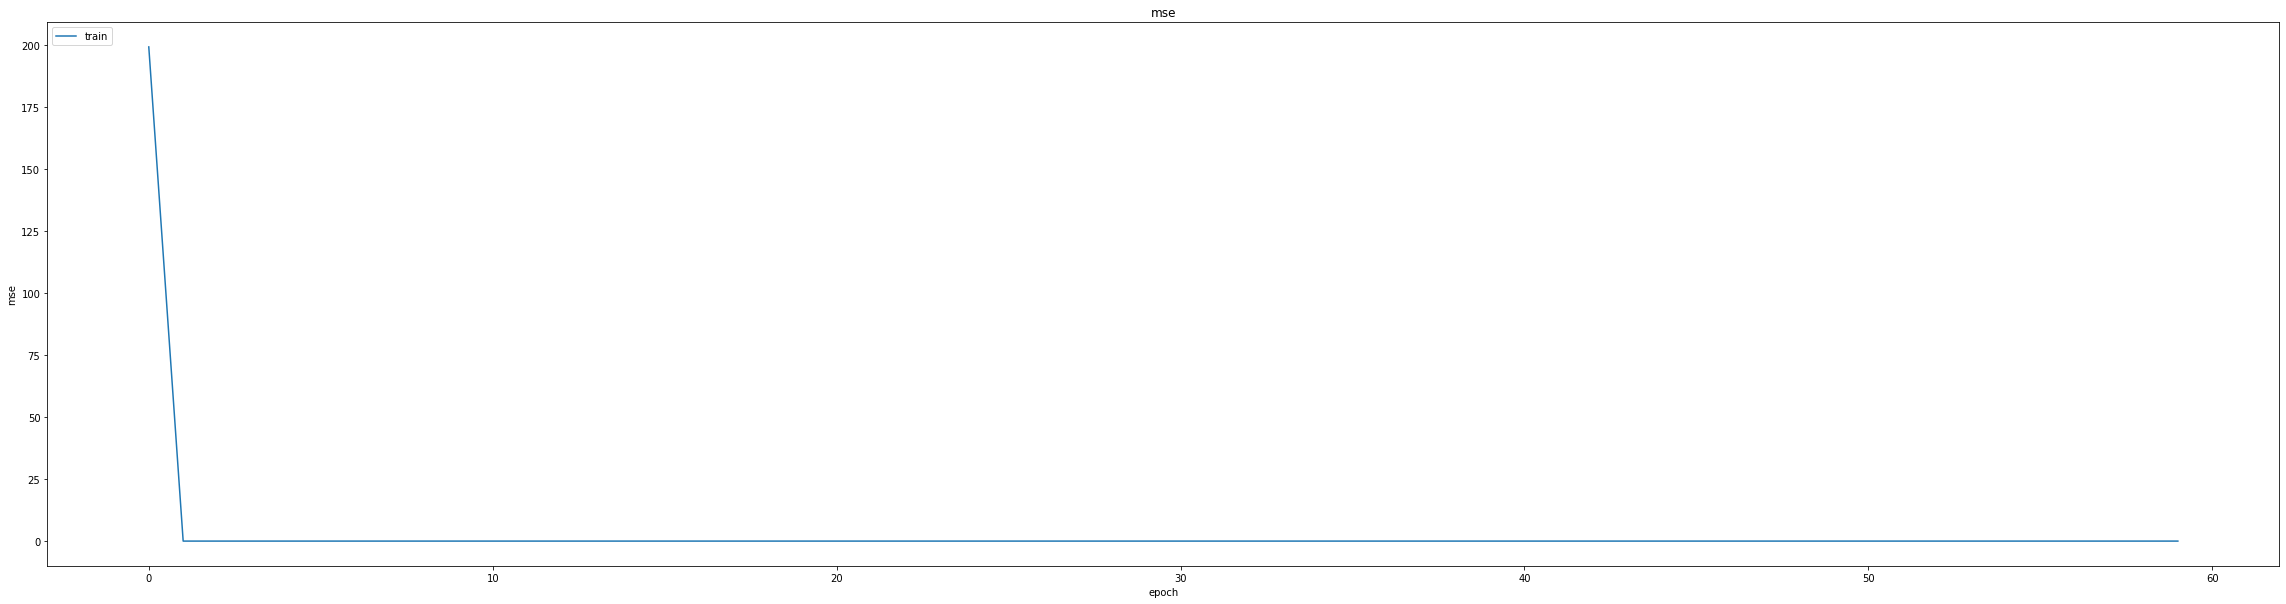

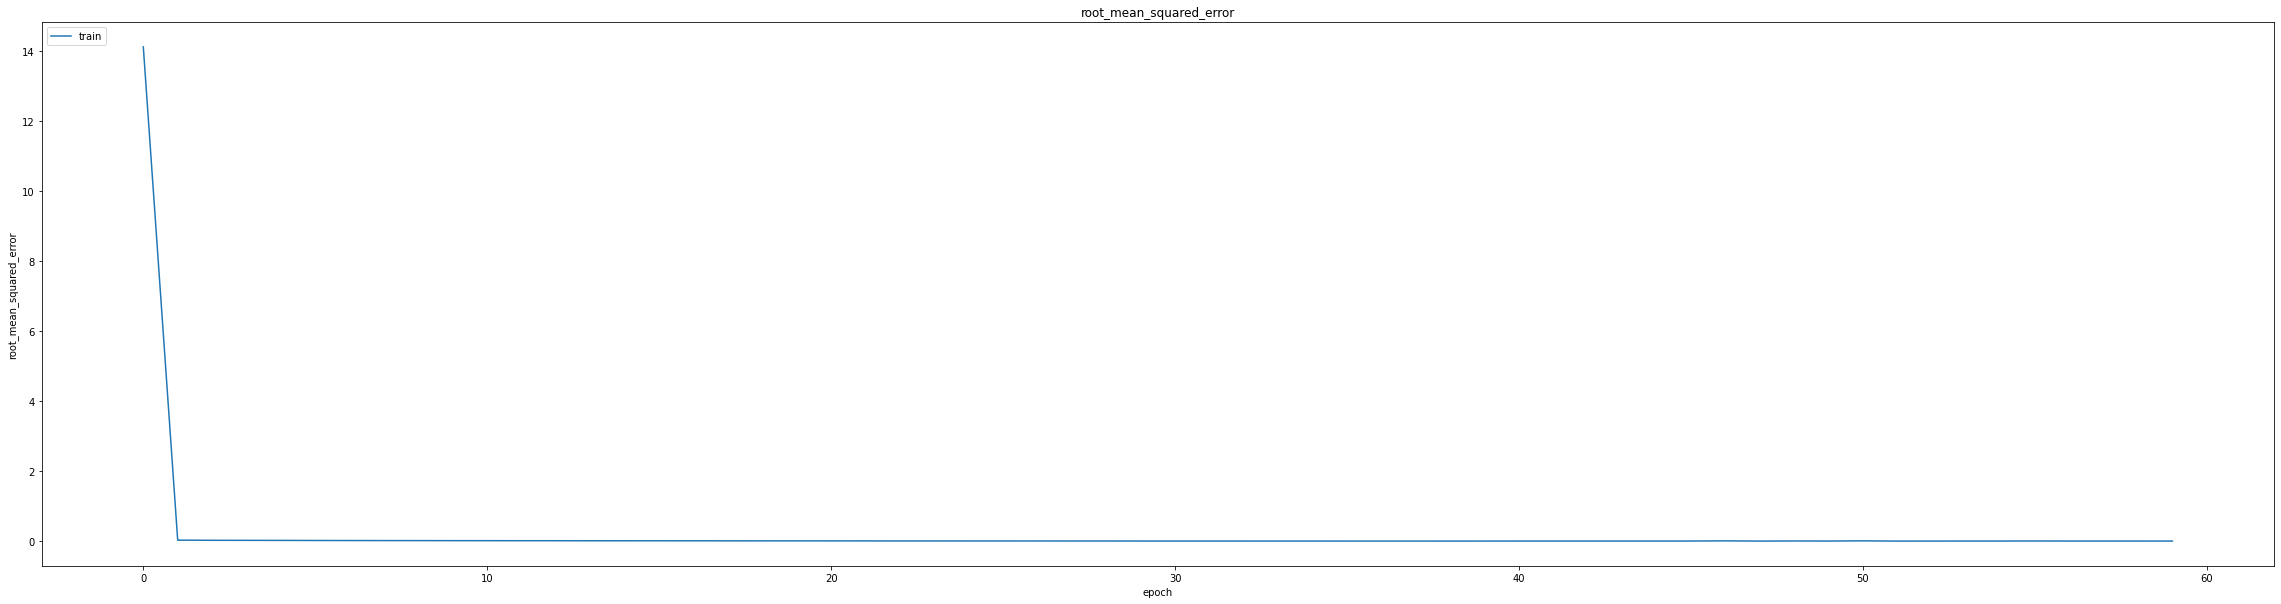

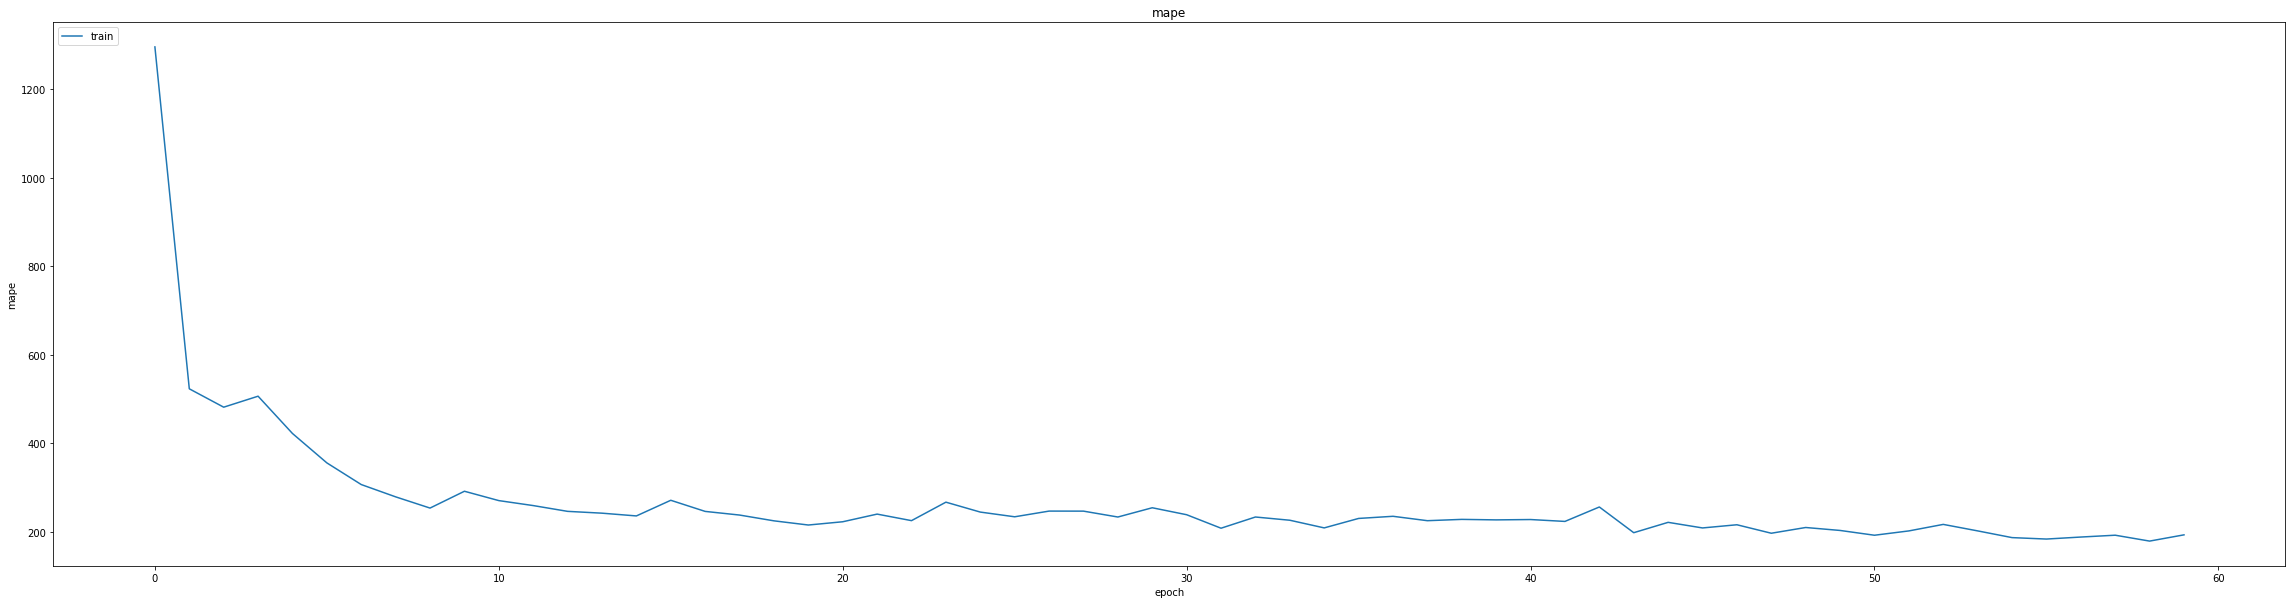

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.005950717255473137
0.008370804600417614
687/687 [==============================] - 20s 27ms/step
0.9966531369783017


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY15min_CNN_BiLSTM.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 1.6159e-04 - mae: 0.0047 - mse: 1.6159e-04 - root_mean_squared_error: 0.0127 - mape: 205.3094
Epoch 1: val_mse did not improve from 0.00007
463/463 [==============================] - 240s 507ms/step - loss: 1.6159e-04 - mae: 0.0047 - mse: 1.6159e-04 - root_mean_squared_error: 0.0127 - mape: 205.3094 - val_loss: 8.5273e-05 - val_mae: 0.0068 - val_mse: 8.5273e-05 - val_root_mean_squared_error: 0.0092 - val_mape: 1589.9279 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 1.0042e-05 - mae: 0.0023 - mse: 1.0042e-05 - root_mean_squared_error: 0.0032 - mape: 187.1736
Epoch 2: val_mse did not improve from 0.00007
463/463 [==============================] - 234s 506ms/step - loss: 1.0042e-05 - mae: 0.0023 - mse: 1.0042e-05 - root_mean_squared_error: 0.0032 - mape: 187.1736 - val_loss: 8.1060e-05 - val_mae: 0.0066 - val_mse: 8.1060e-05 - val_root_mean_squared_error: 0.0090 - val_mape: 1478.3727

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))

0.006644300185143948
0.009003335610032082


In [ ]:

#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

687/687 [==============================] - 17s 23ms/step


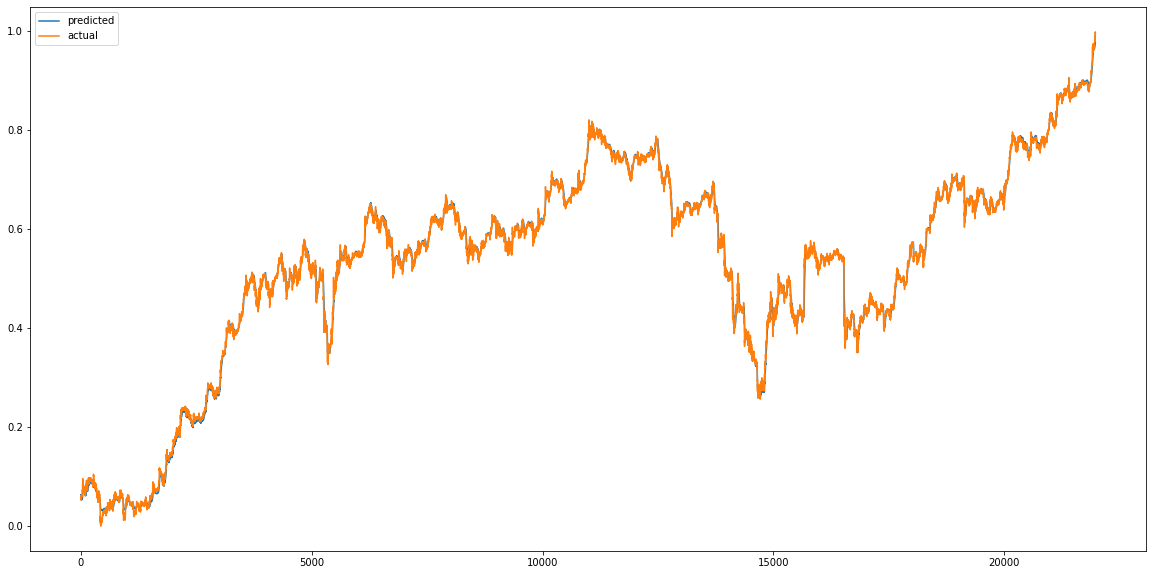

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY15min_CNN_BiLSTM.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


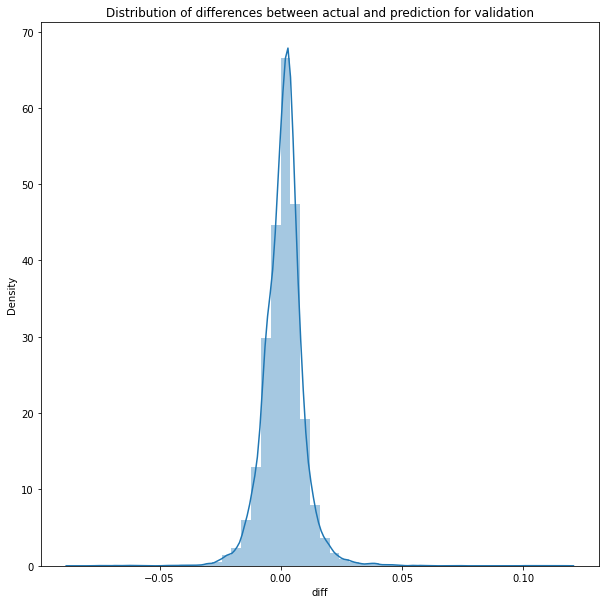

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 16s 23ms/step


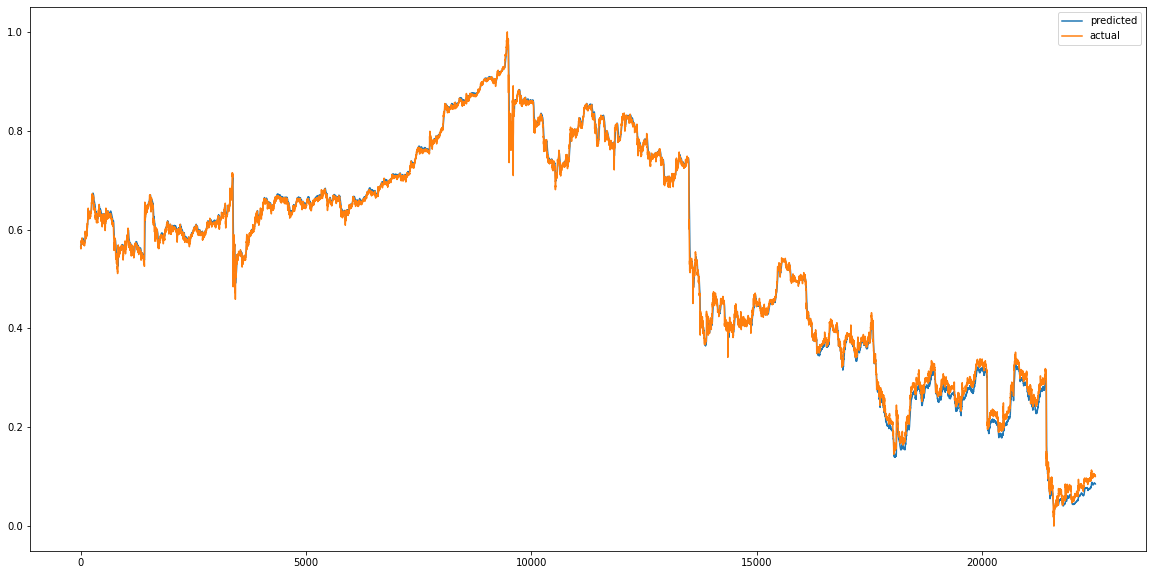

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


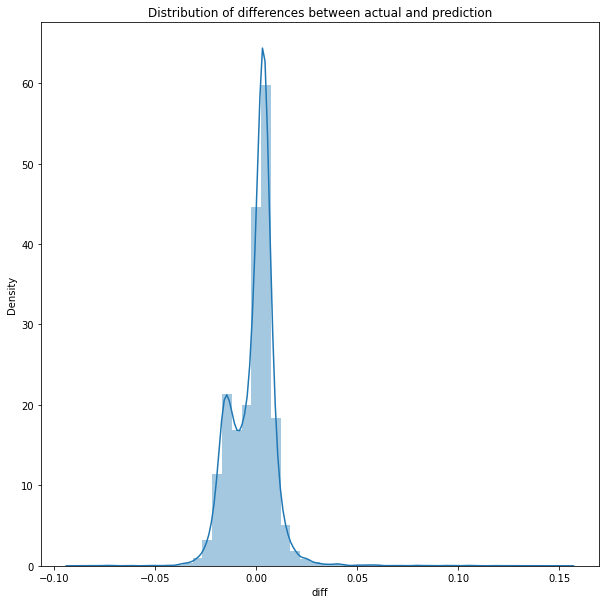

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.00012296546422262692
MAE :  0.00786932435839229
RMSE  : 0.011088979404013108
704/704 [==============================] - 16s 23ms/step
R2_Score  : 0.9975192414304592


count    22523.000000
mean        -0.001167
std          0.011028
min         -0.089470
25%         -0.008103
50%          0.001183
75%          0.004934
max          0.152517
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 gru (GRU)                   (None, 24, 256)           247296    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]


Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 364.5261 - mae: 2.7039 - mse: 364.5261 - root_mean_squared_error: 19.0926 - mape: 4743.4683
Epoch 1: val_mse improved from inf to 0.09291, saving model to weights.best.hdf5
463/463 [==============================] - 188s 399ms/step - loss: 364.5261 - mae: 2.7039 - mse: 364.5261 - root_mean_squared_error: 19.0926 - mape: 4743.4683 - val_loss: 0.0929 - val_mae: 0.2756 - val_mse: 0.0929 - val_root_mean_squared_error: 0.3048 - val_mape: 14638.4385
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0325 - mae: 0.1316 - mse: 0.0325 - root_mean_squared_error: 0.1802 - mape: 1623.0251
Epoch 2: val_mse improved from 0.09291 to 0.07481, saving model to weights.best.hdf5
463/463 [==============================] - 182s 394ms/step - loss: 0.0325 - mae: 0.1316 - mse: 0.0325 - root_mean_squared_error: 0.1802 - mape: 1623.0251 - val_loss: 0.0748 - val_mae: 0.2464 - val_mse: 0.0748 - val_root_mean_squared_error: 

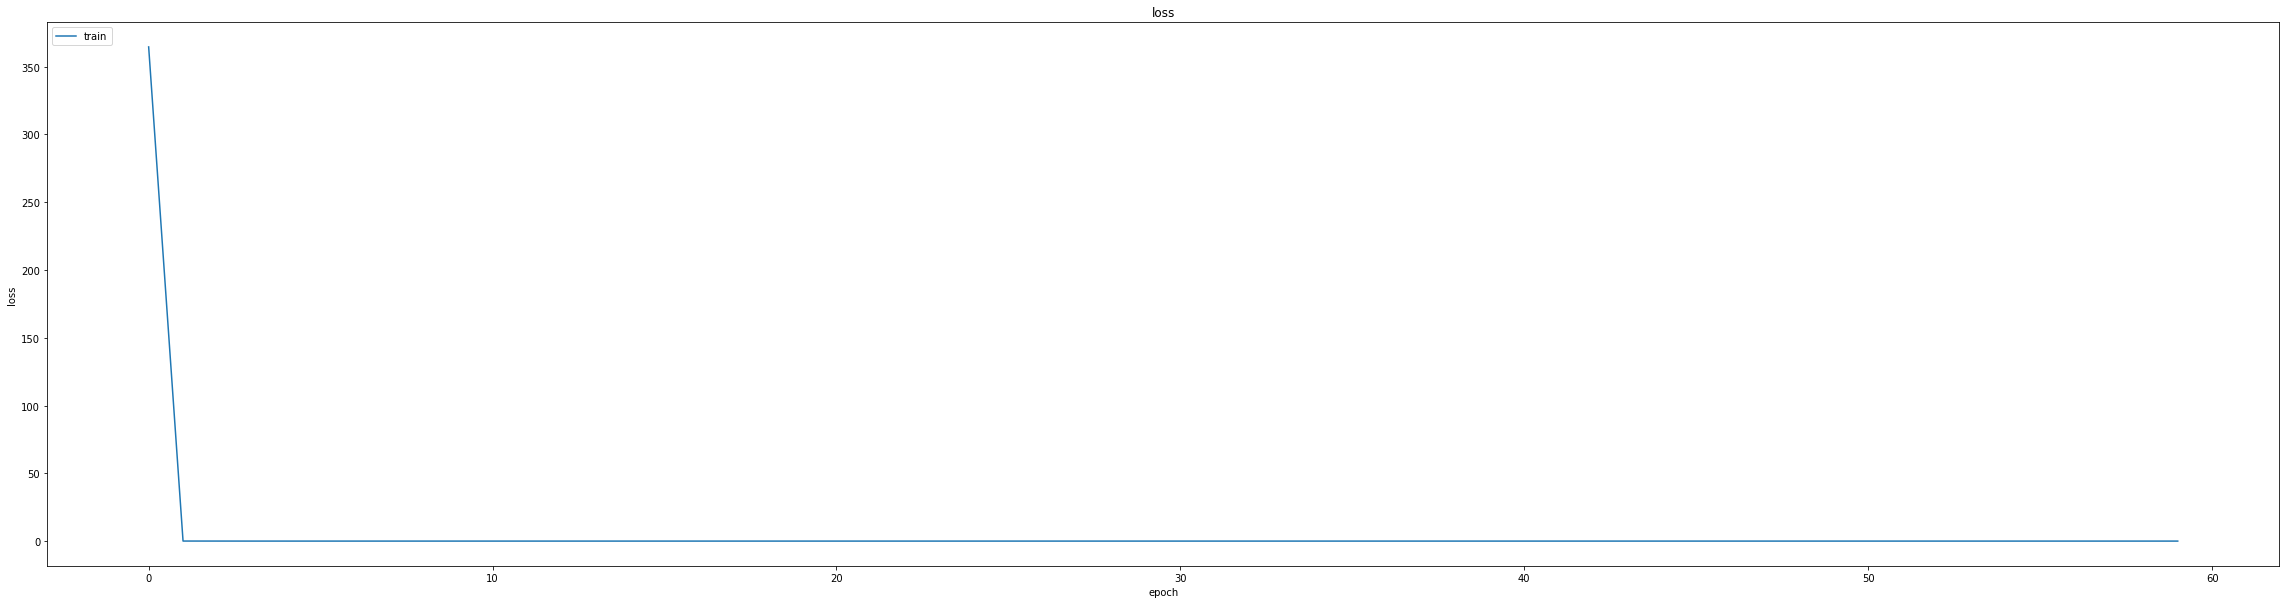

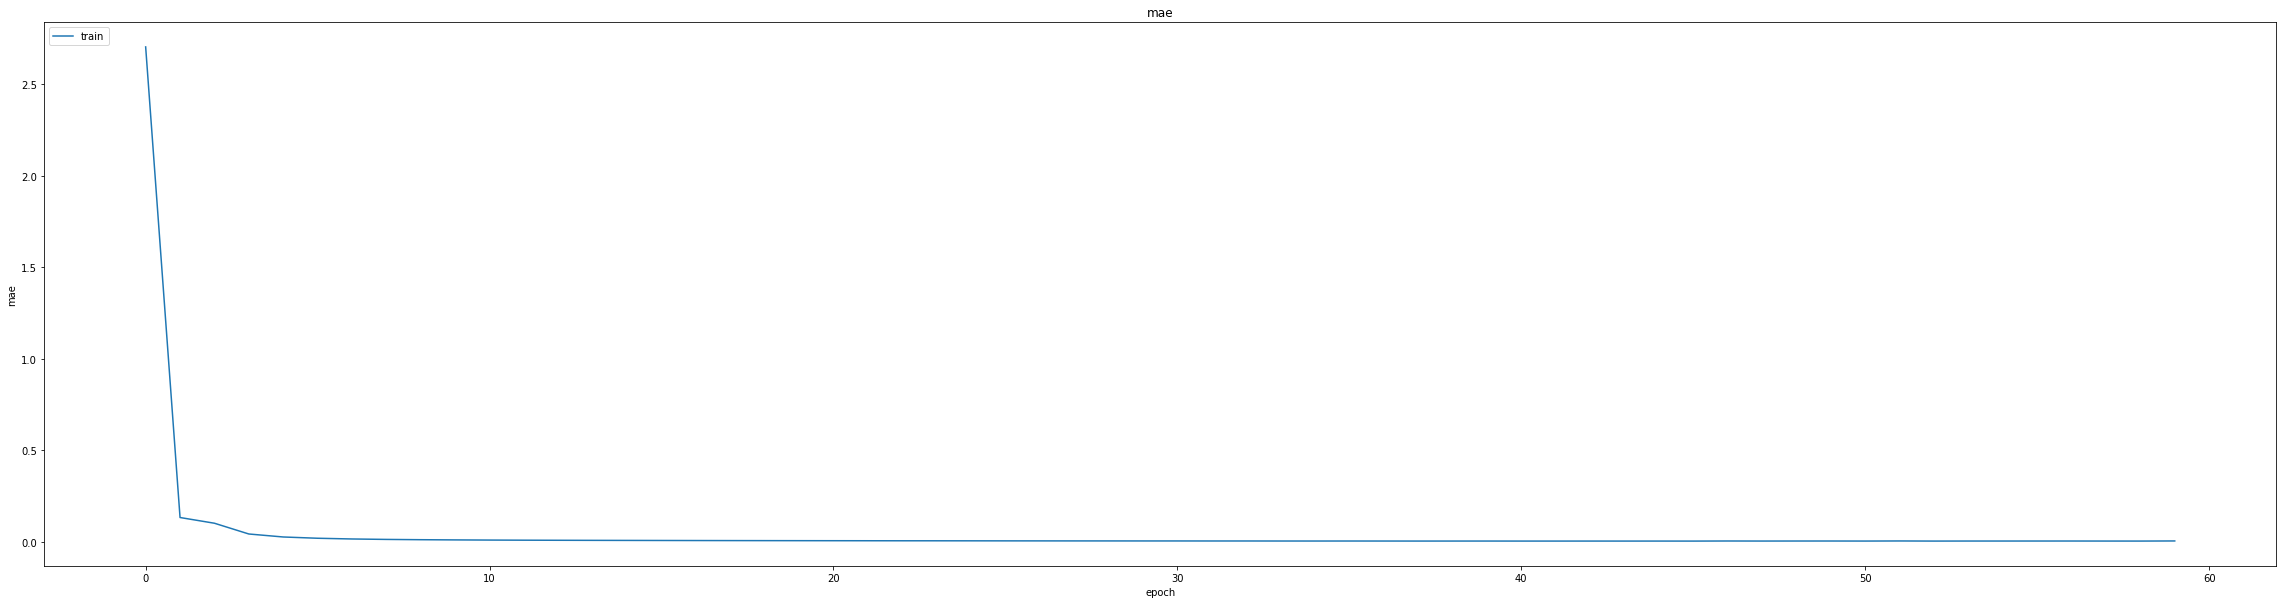

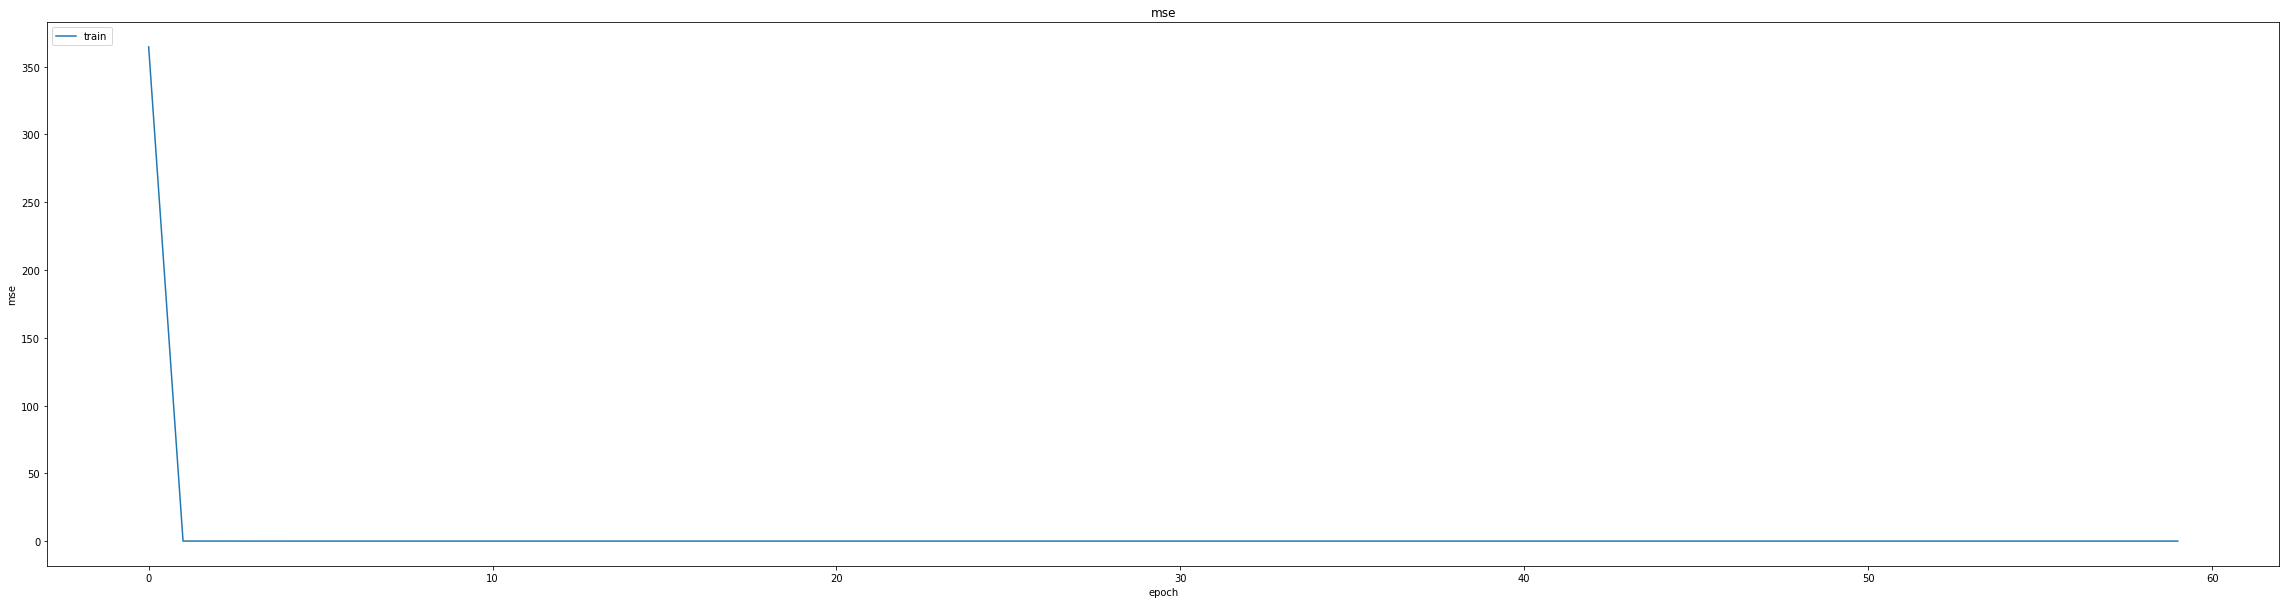

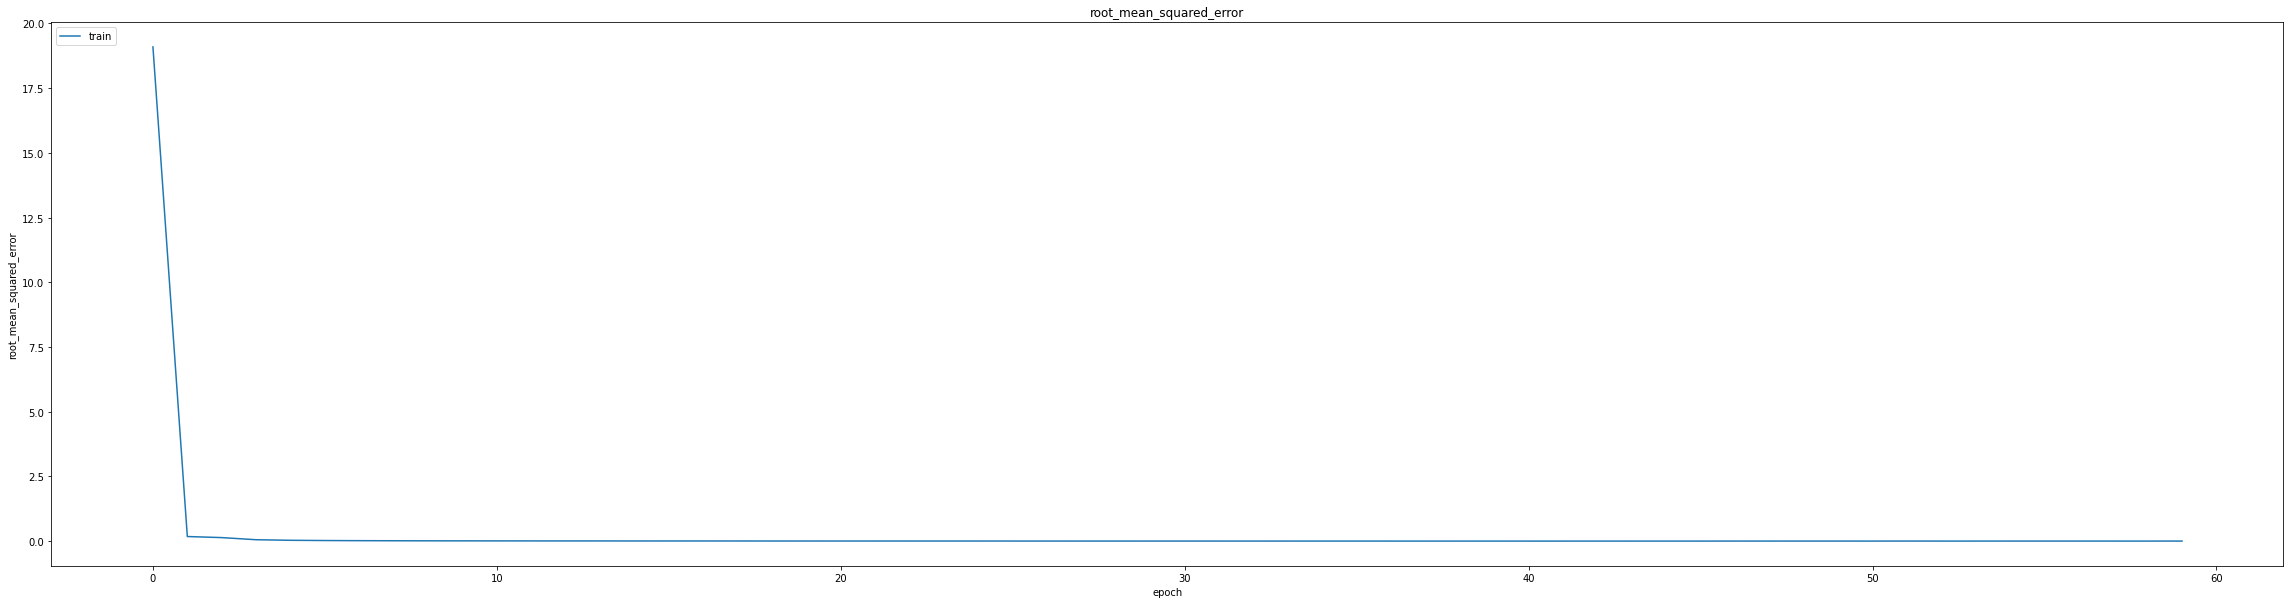

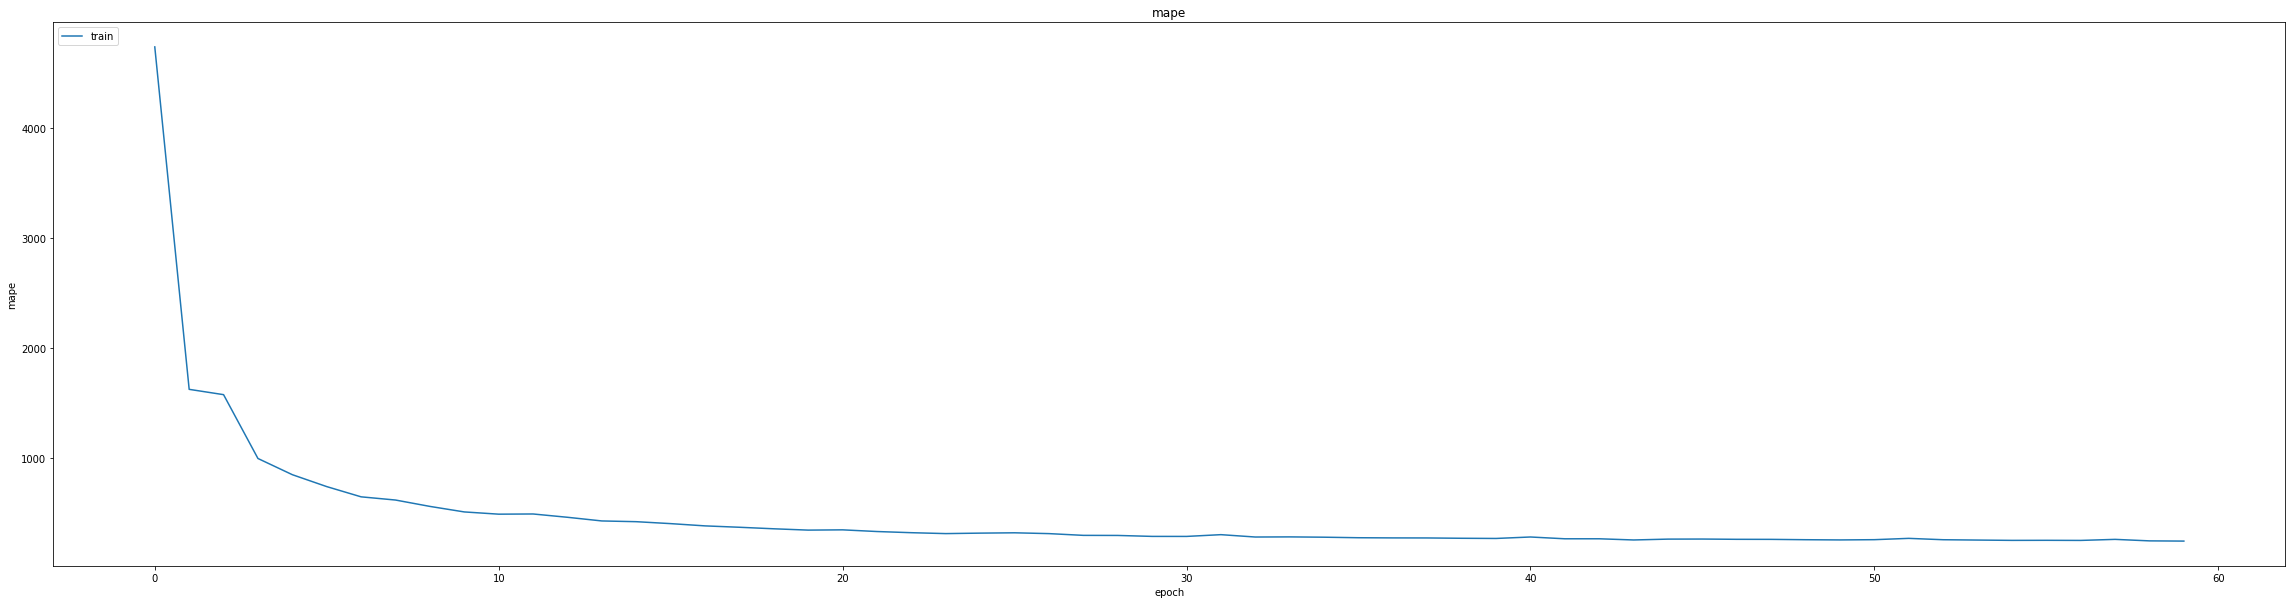

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.016046829521656036
0.01806478761136532
687/687 [==============================] - 15s 20ms/step
0.9872401255200495


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=12)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 9.2045e-05 - mae: 0.0037 - mse: 9.2045e-05 - root_mean_squared_error: 0.0096 - mape: 248.2777
Epoch 1: val_mse did not improve from 0.00033
463/463 [==============================] - 190s 403ms/step - loss: 9.2045e-05 - mae: 0.0037 - mse: 9.2045e-05 - root_mean_squared_error: 0.0096 - mape: 248.2777 - val_loss: 4.9857e-04 - val_mae: 0.0203 - val_mse: 4.9857e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 1966.1772 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 7.1024e-06 - mae: 0.0019 - mse: 7.1024e-06 - root_mean_squared_error: 0.0027 - mape: 233.7744
Epoch 2: val_mse did not improve from 0.00033
463/463 [==============================] - 190s 411ms/step - loss: 7.1024e-06 - mae: 0.0019 - mse: 7.1024e-06 - root_mean_squared_error: 0.0027 - mape: 233.7744 - val_loss: 5.9506e-04 - val_mae: 0.0226 - val_mse: 5.9506e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 1836.0012

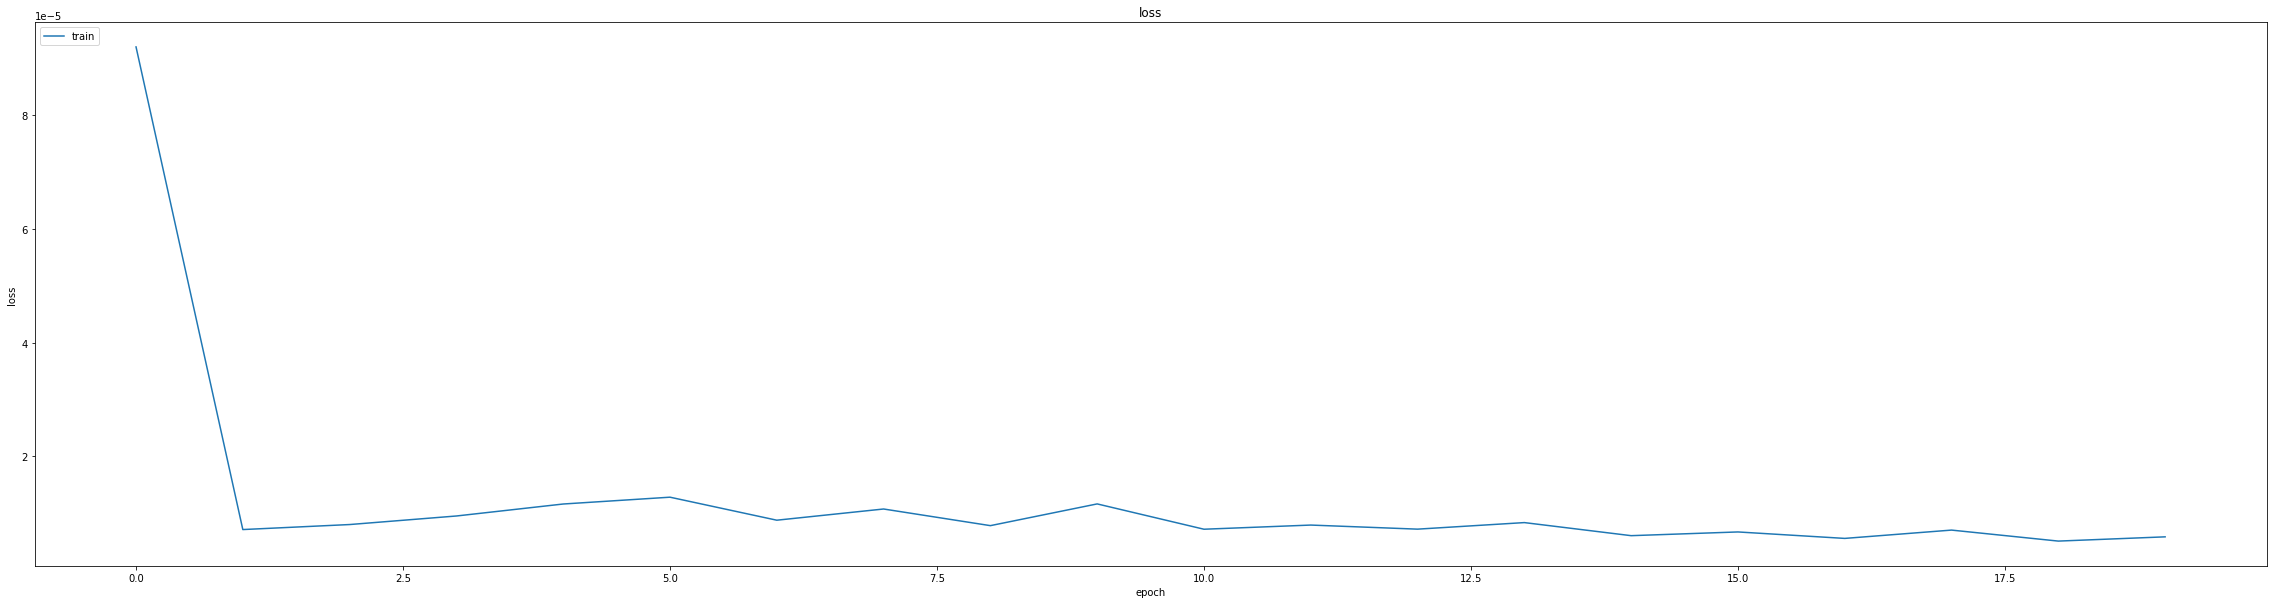

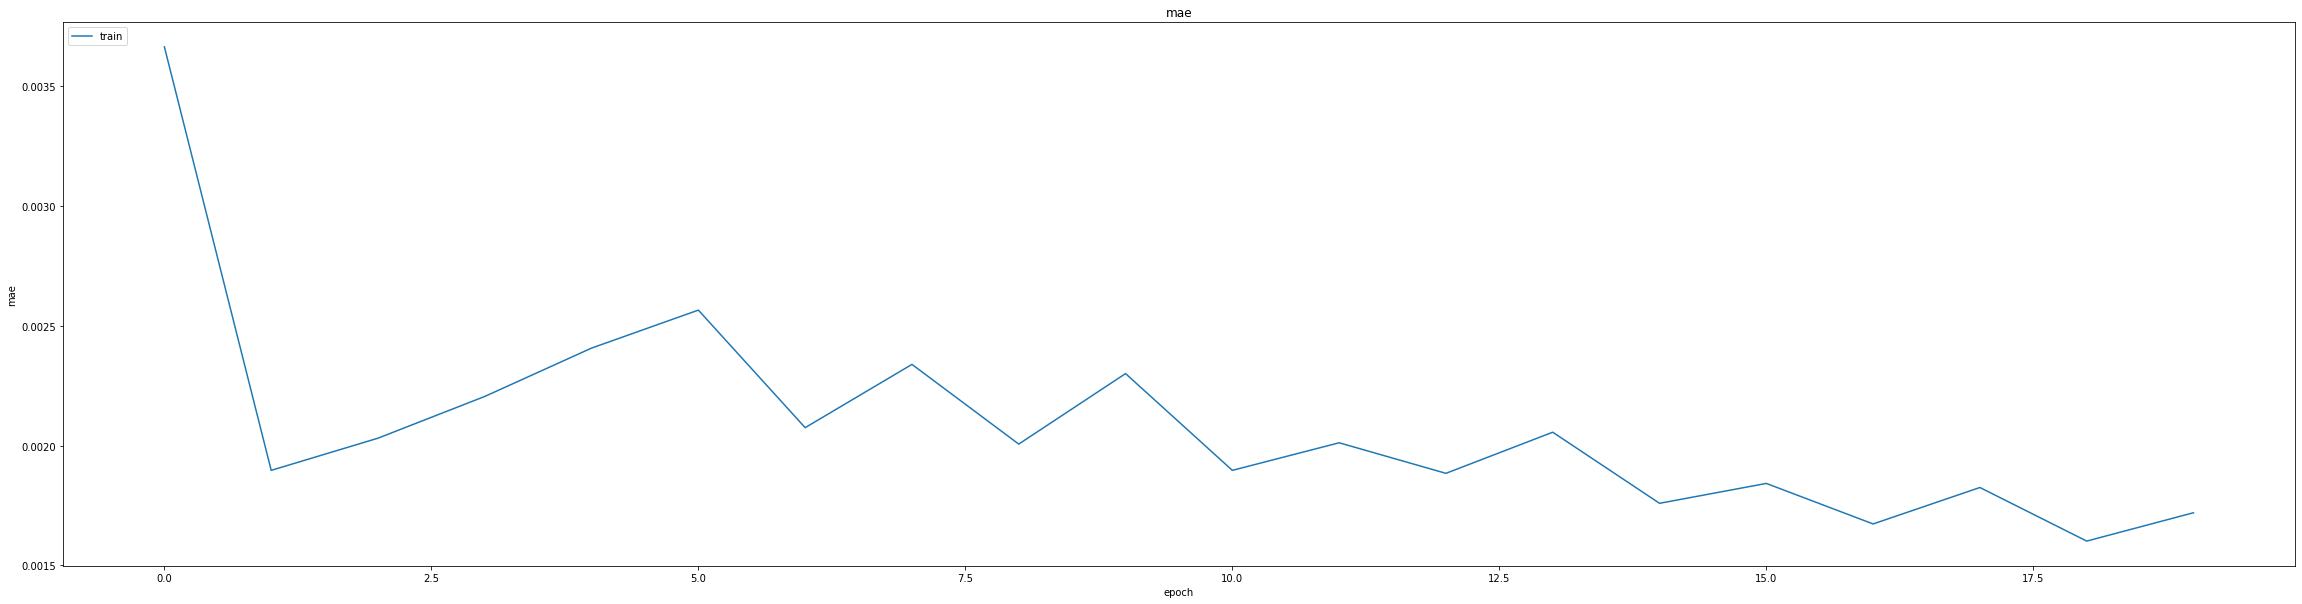

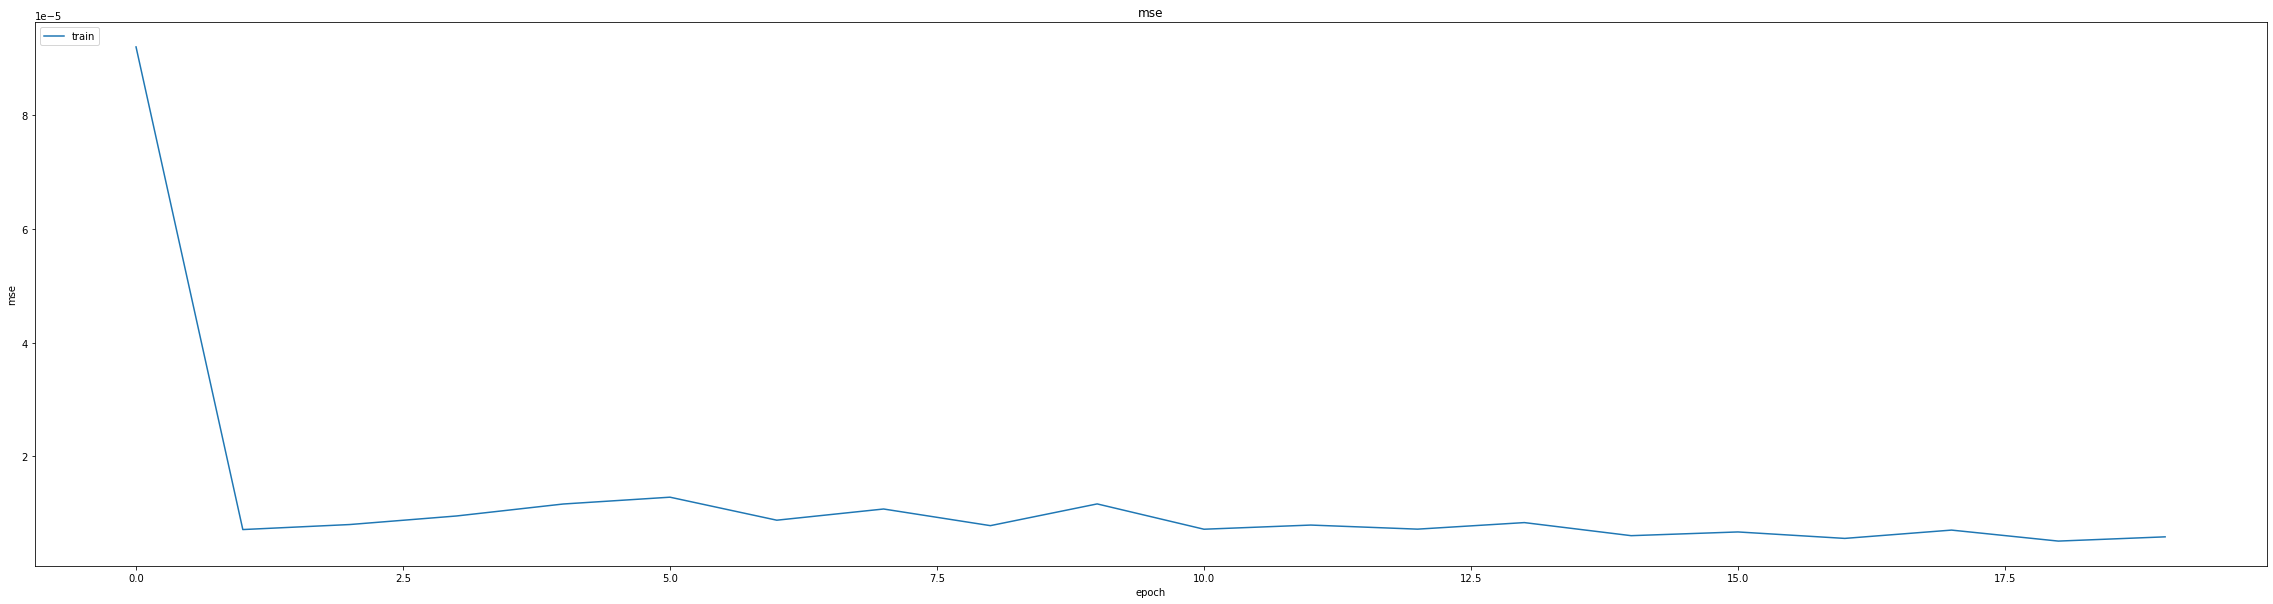

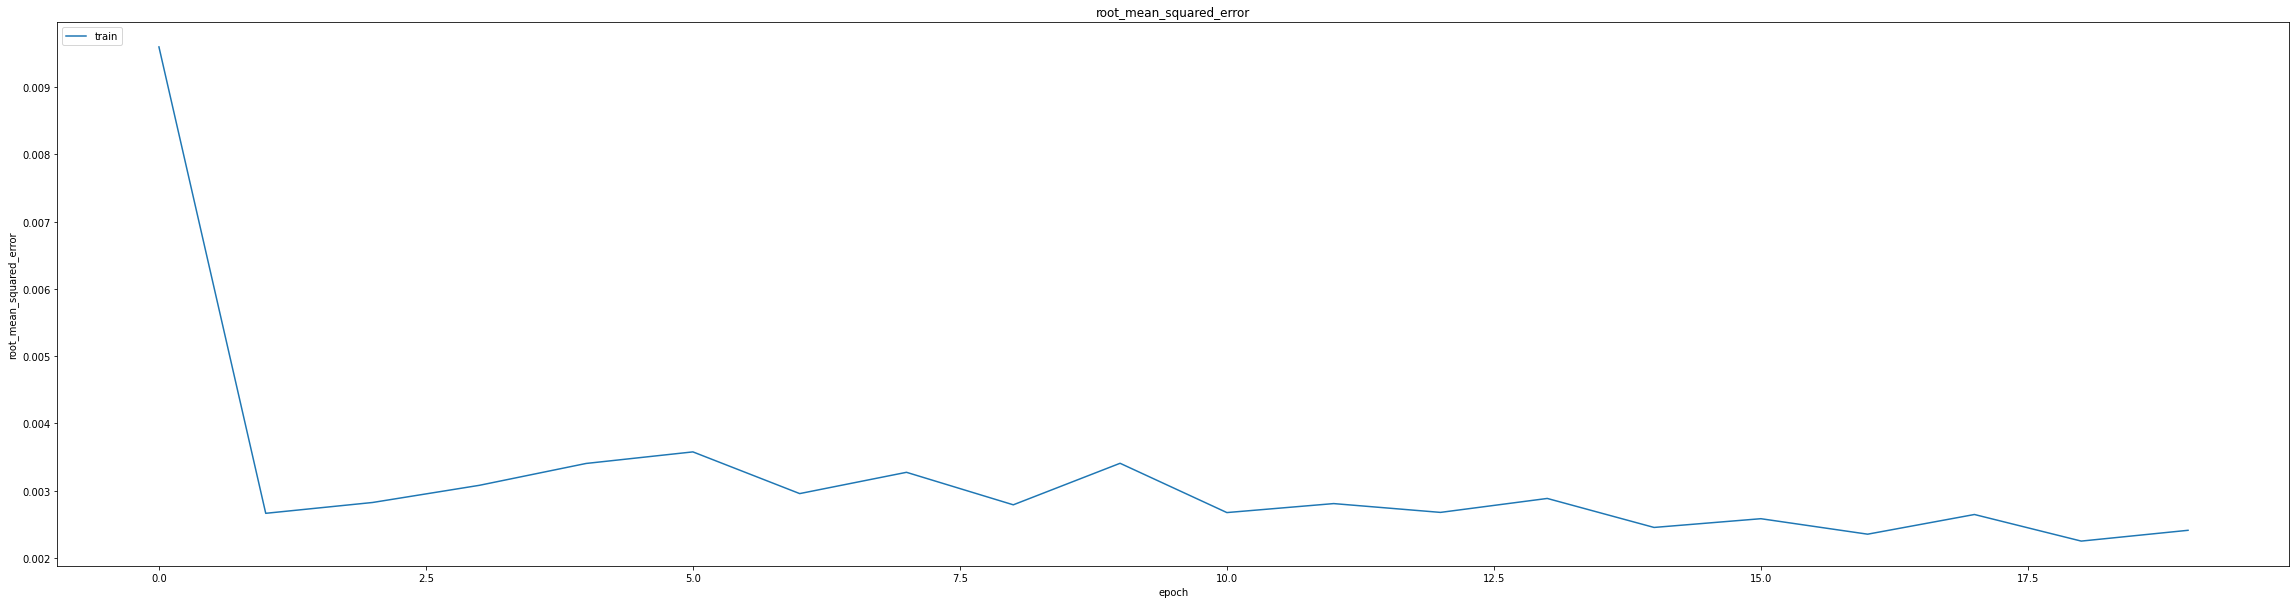

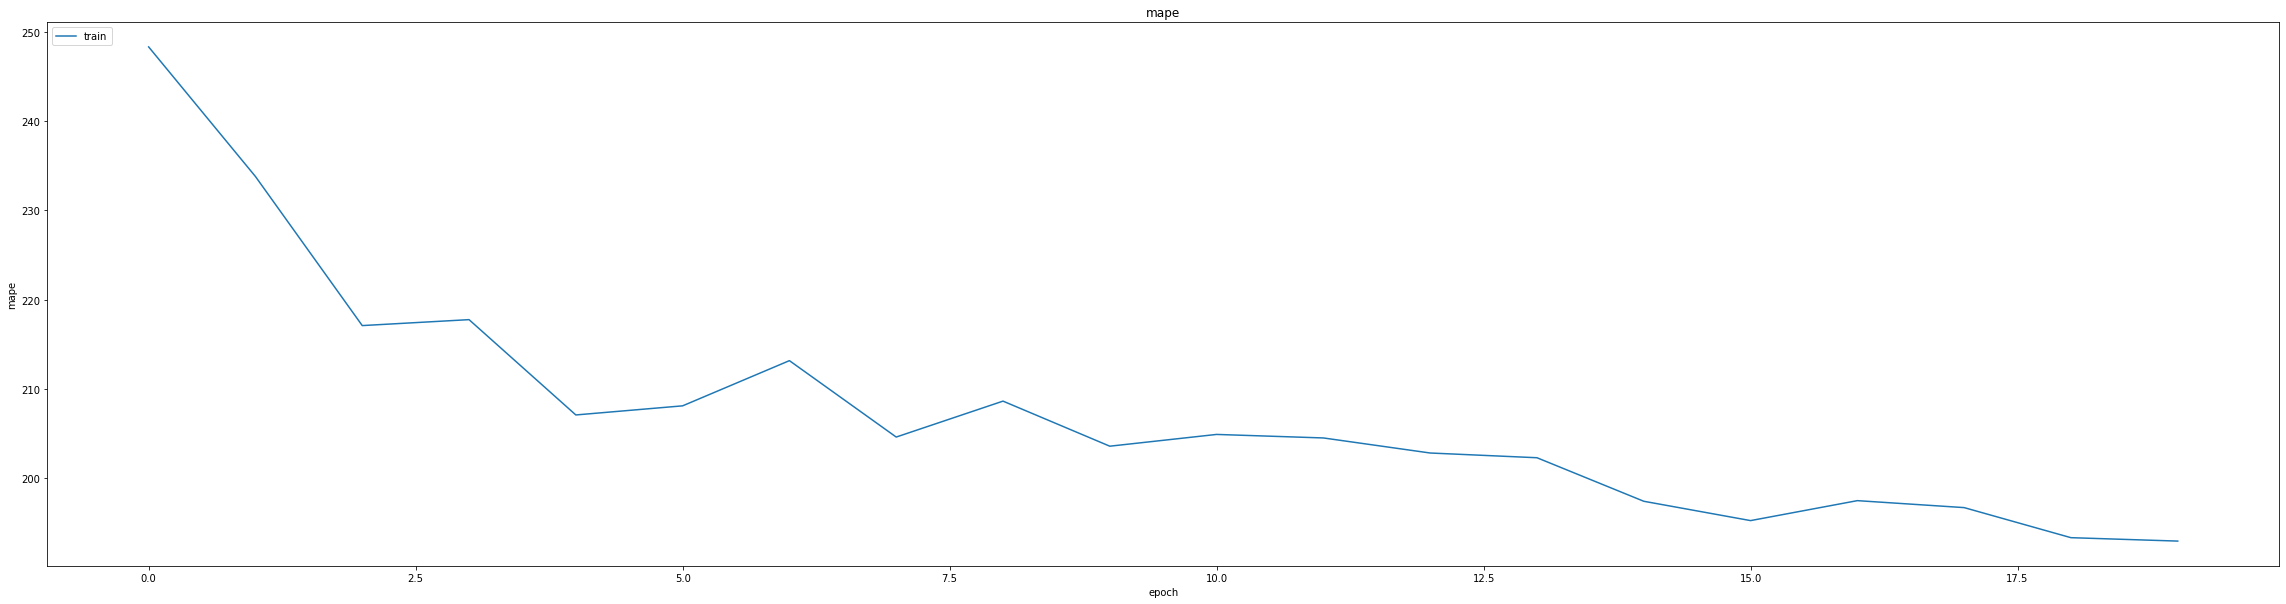

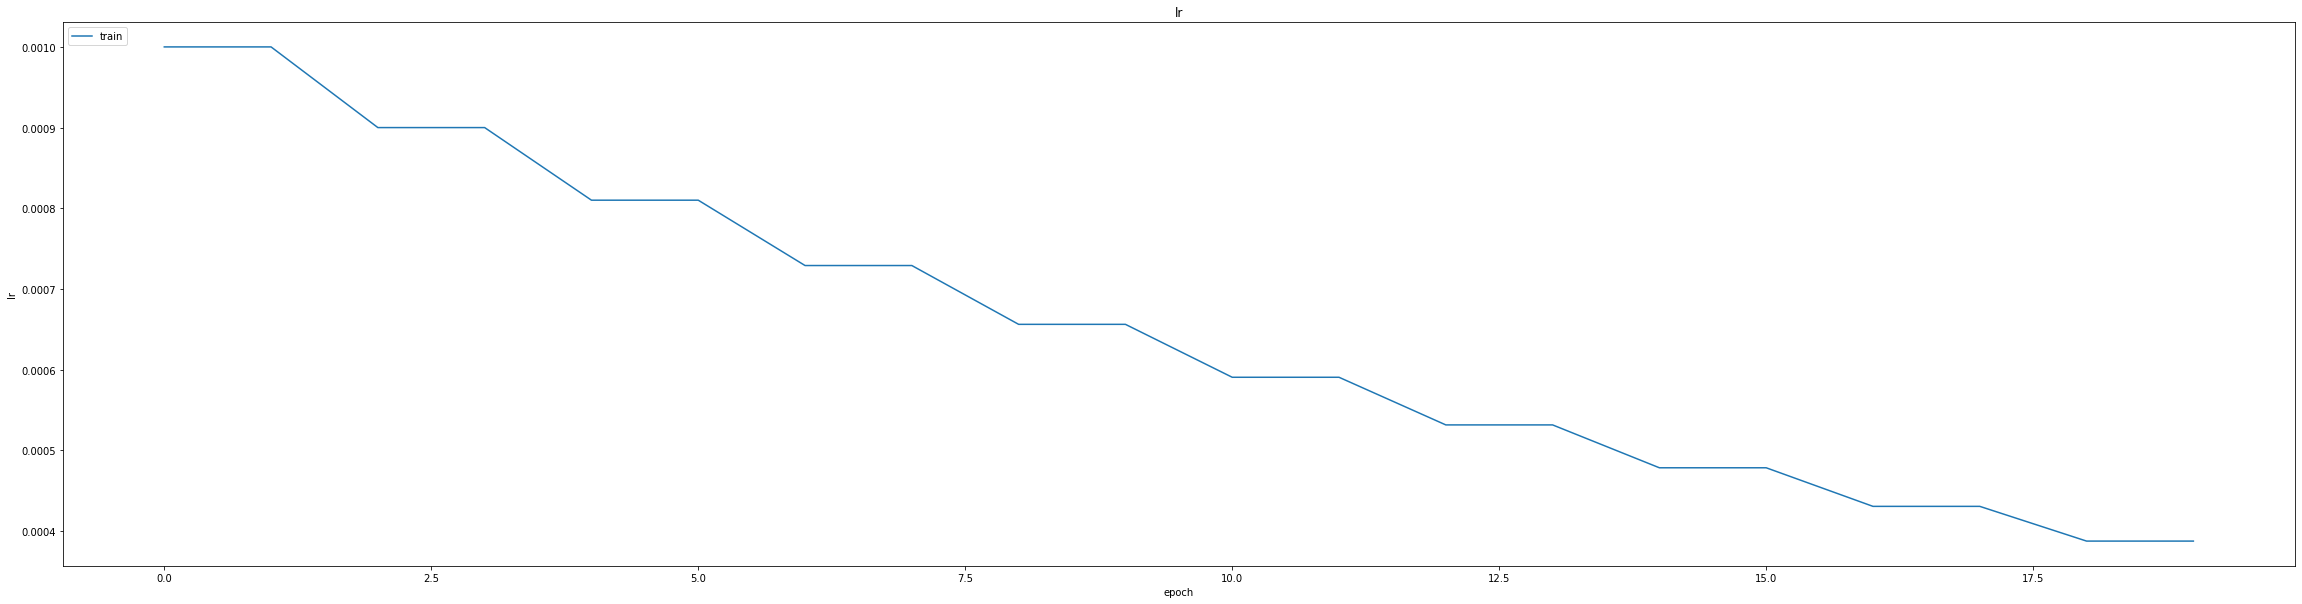

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01141632255166769
0.013268709182739258
687/687 [==============================] - 14s 20ms/step
0.9907203057430002


687/687 [==============================] - 13s 19ms/step


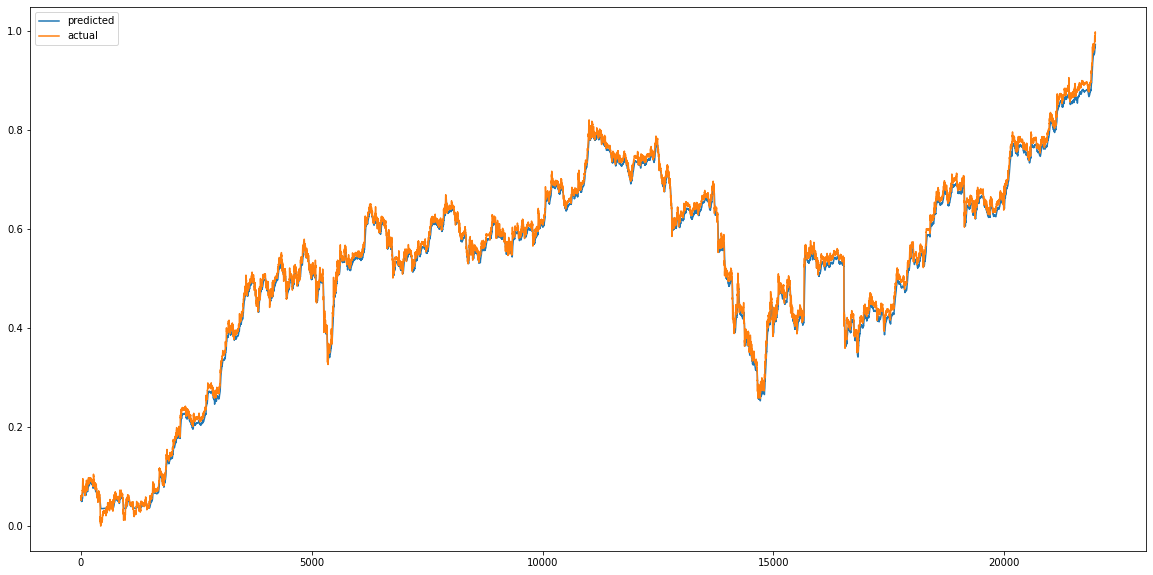

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


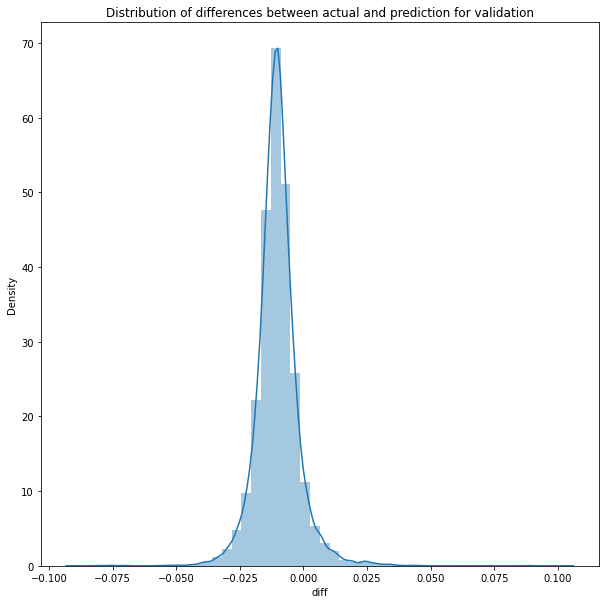

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 14s 19ms/step


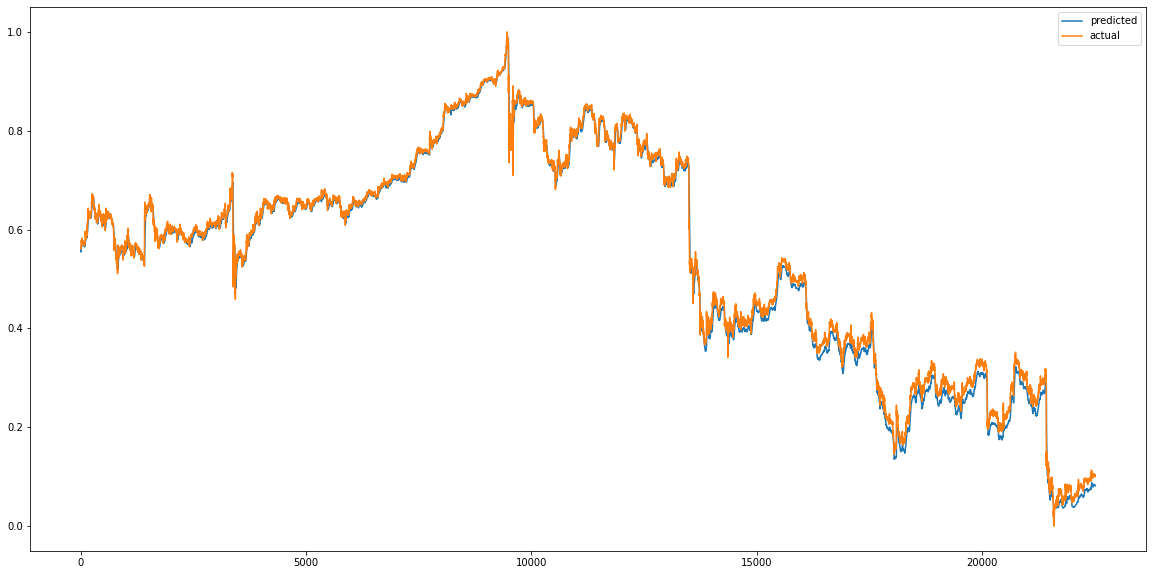

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


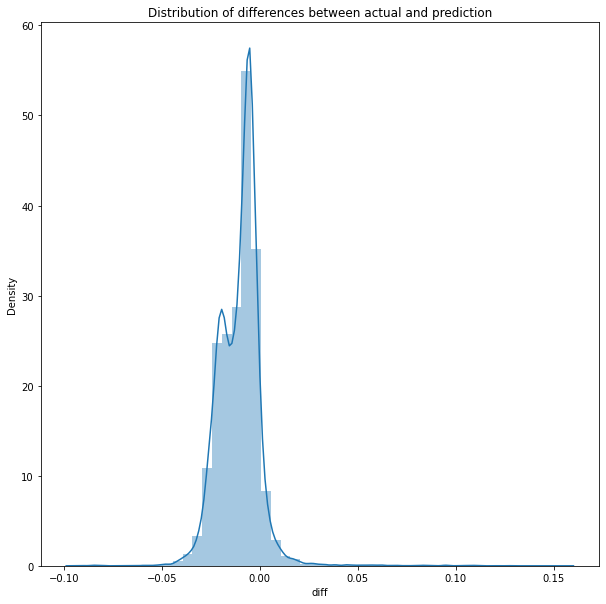

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.00023036351092227232
MAE :  0.011851082632322853
RMSE  : 0.015177730756680075
704/704 [==============================] - 14s 20ms/step
R2_Score  : 0.9953525466899075


count    22523.000000
mean        -0.010423
std          0.011033
min         -0.094275
25%         -0.017791
50%         -0.008747
75%         -0.004335
max          0.155673
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           328704    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 459.6349 - mae: 4.8316 - mse: 459.6349 - root_mean_squared_error: 21.4391 - mape: 4969.5776
Epoch 1: val_mse improved from inf to 0.05557, saving model to weights.best.hdf5
463/463 [==============================] - 328s 700ms/step - loss: 459.6349 - mae: 4.8316 - mse: 459.6349 - root_mean_squared_error: 21.4391 - mape: 4969.5776 - val_loss: 0.0556 - val_mae: 0.2012 - val_mse: 0.0556 - val_root_mean_squared_error: 0.2357 - val_mape: 19283.5020
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0408 - mae: 0.1601 - mse: 0.0408 - root_mean_squared_error: 0.2019 - mape: 2118.1848
Epoch 2: val_mse did not improve from 0.05557
463/463 [==============================] - 320s 692ms/step - loss: 0.0408 - mae: 0.1601 - mse: 0.0408 - root_mean_squared_error: 0.2019 - mape: 2118.1848 - val_loss: 0.0894 - val_mae: 0.2697 - val_mse: 0.0894 - val_root_mean_squared_error: 0.2990 - val_mape: 14298.2295
Epoch 3/6

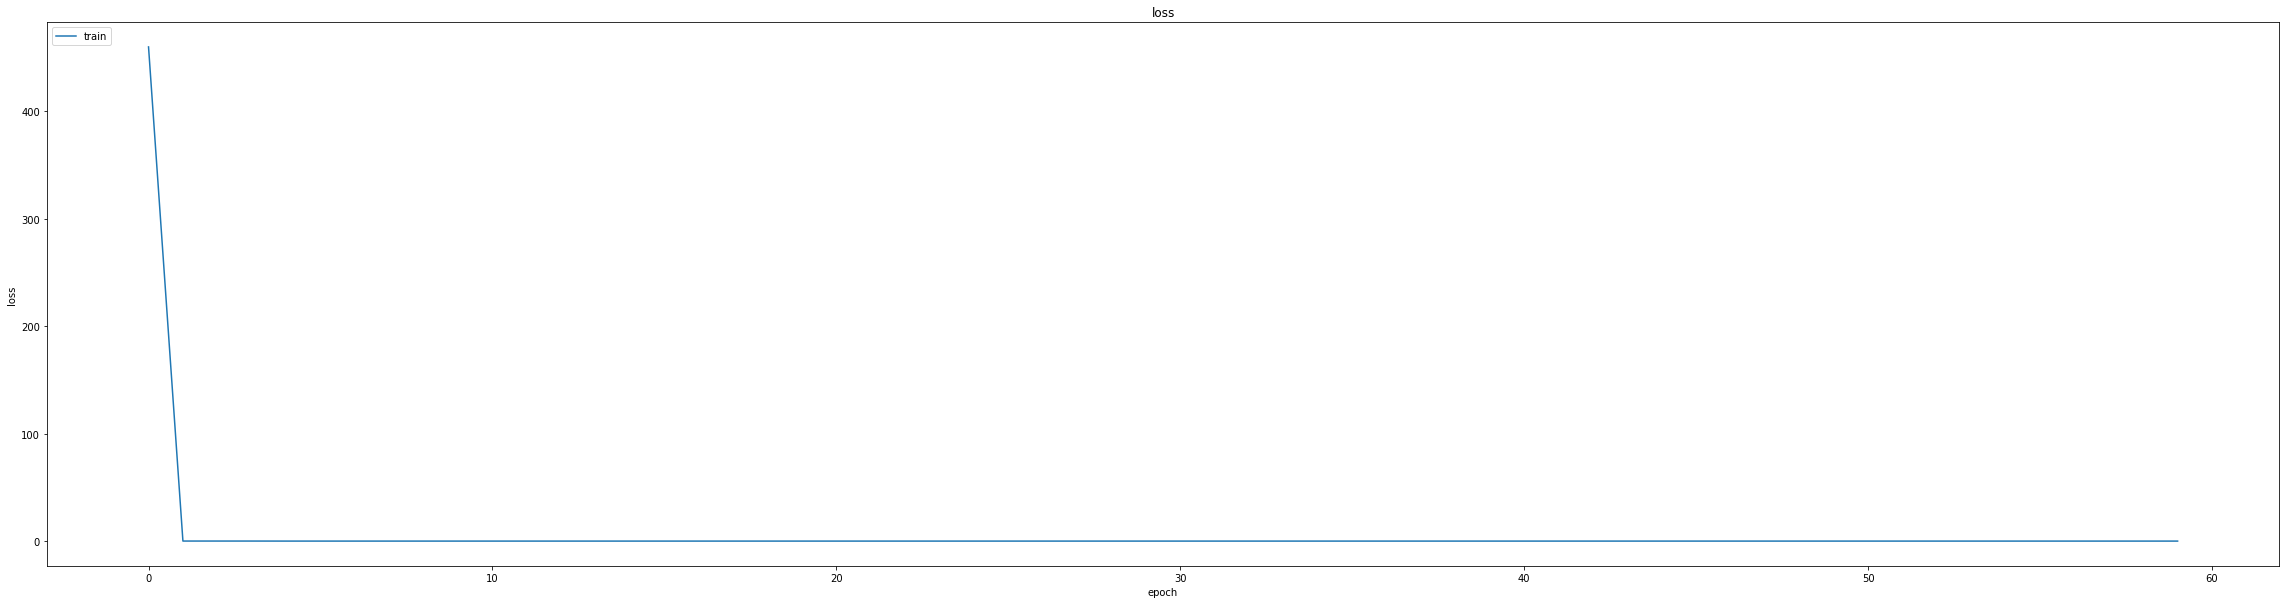

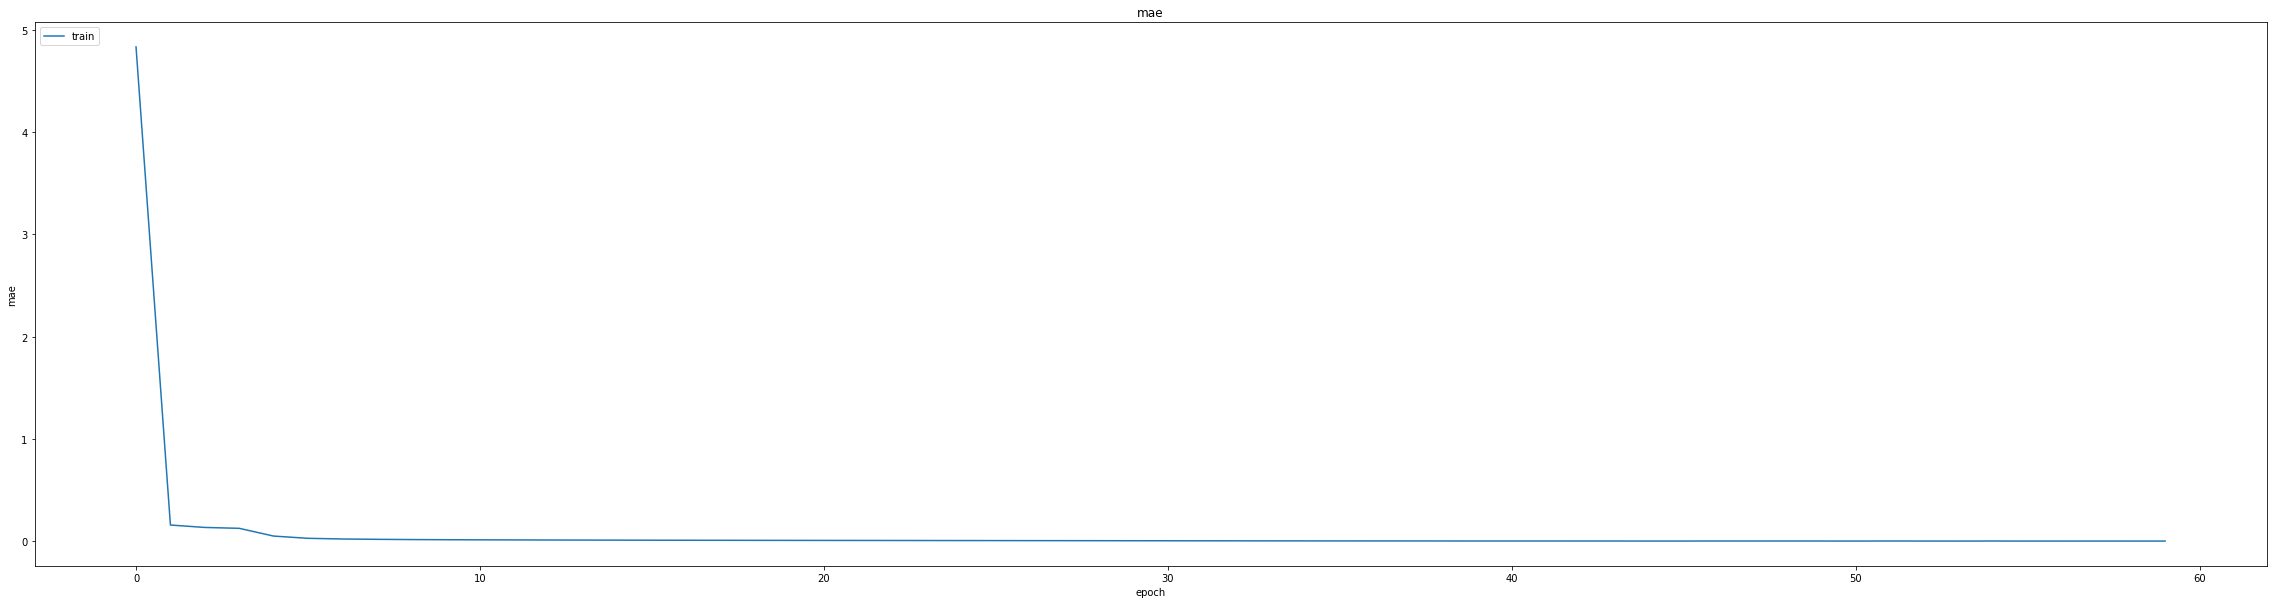

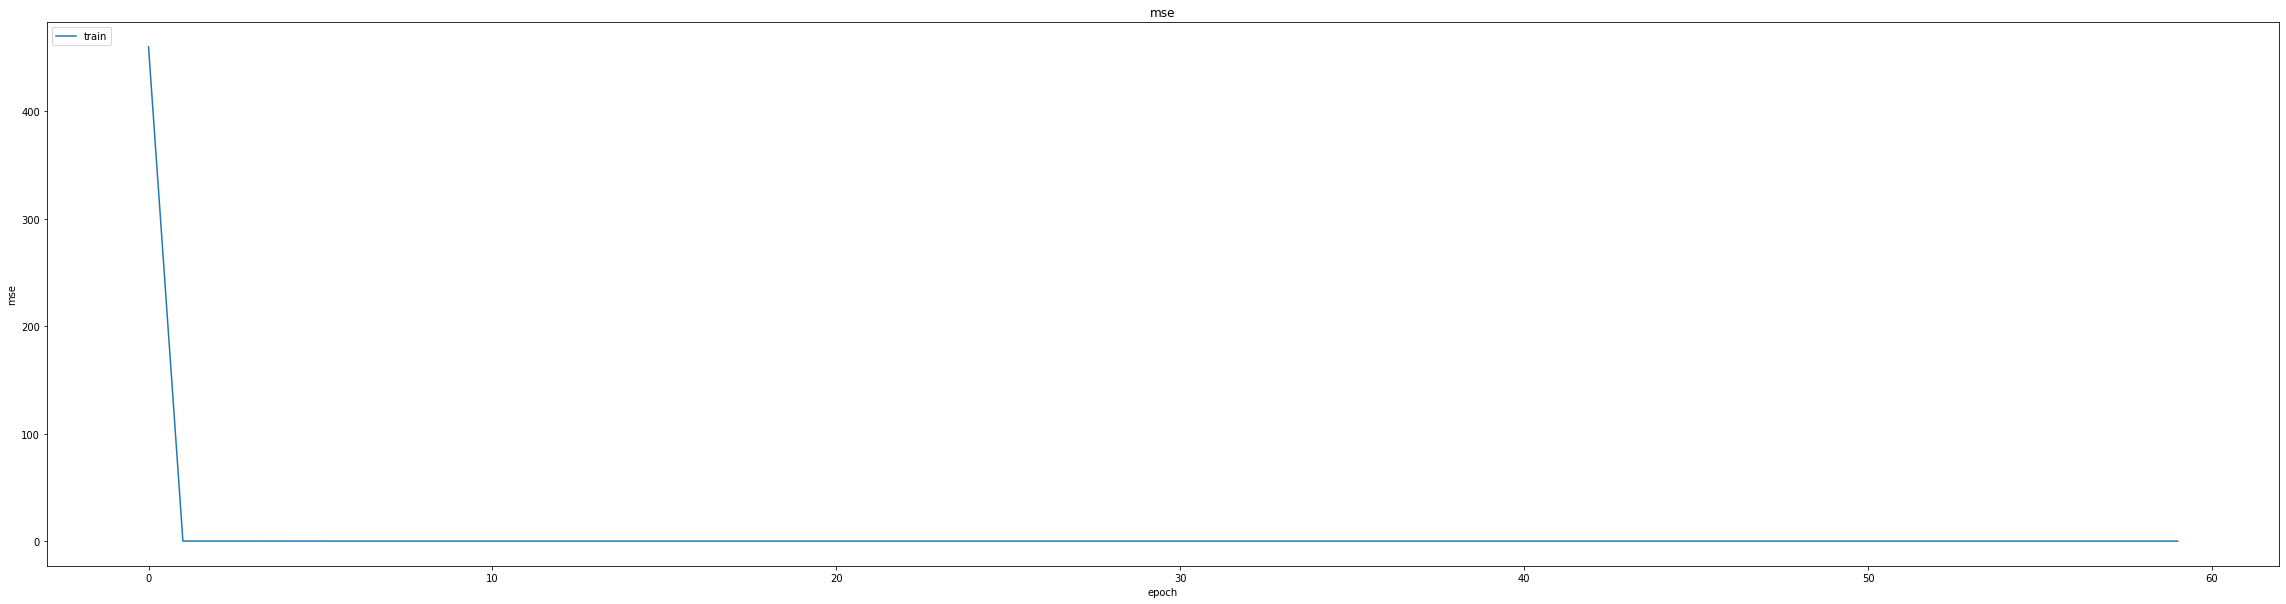

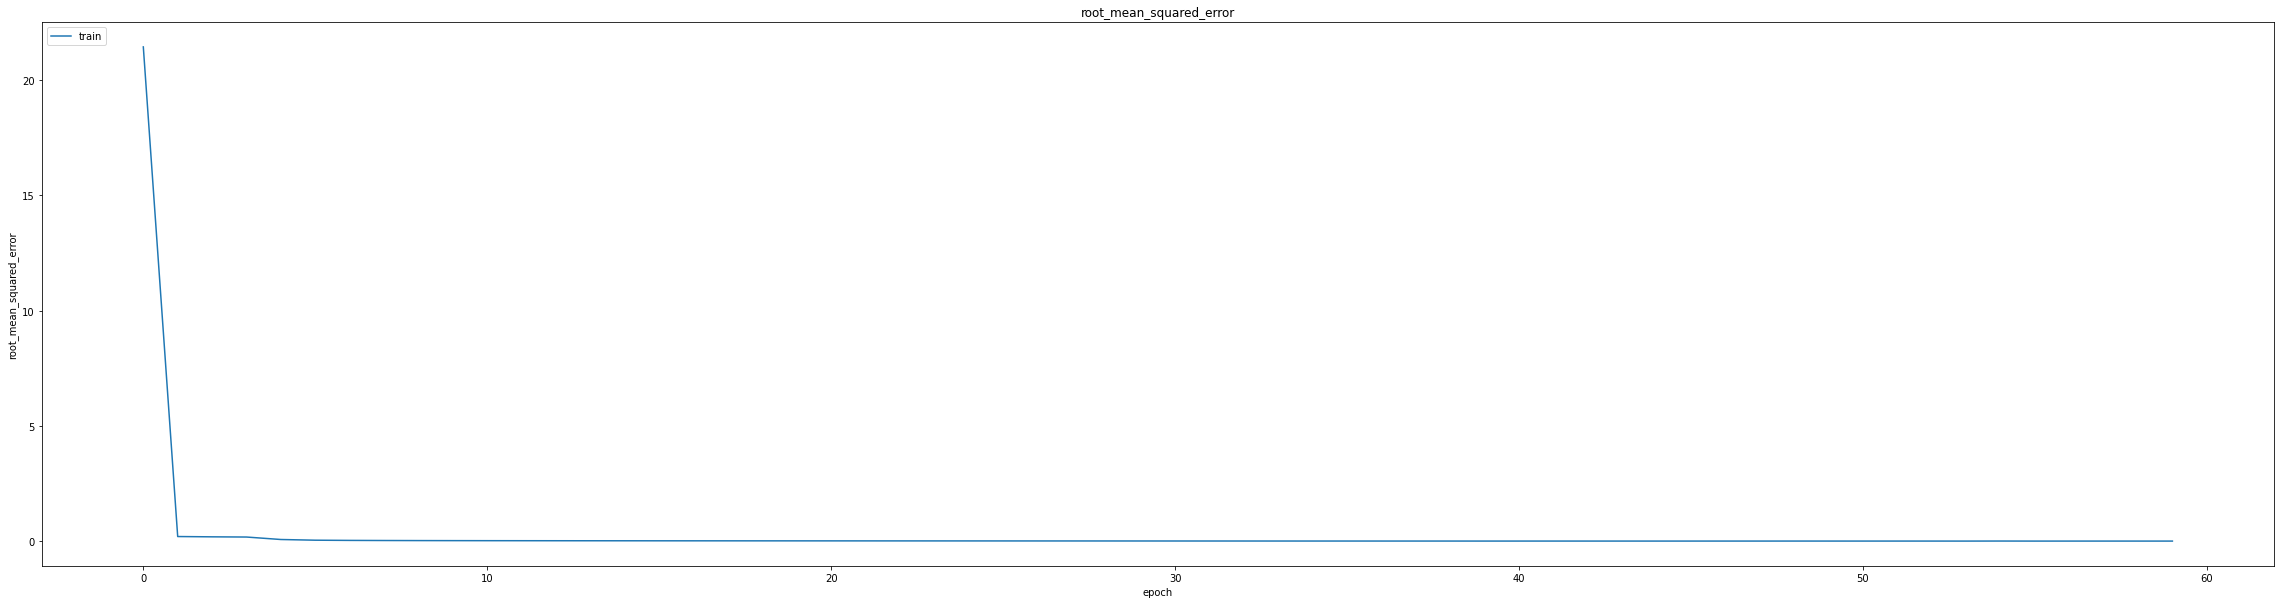

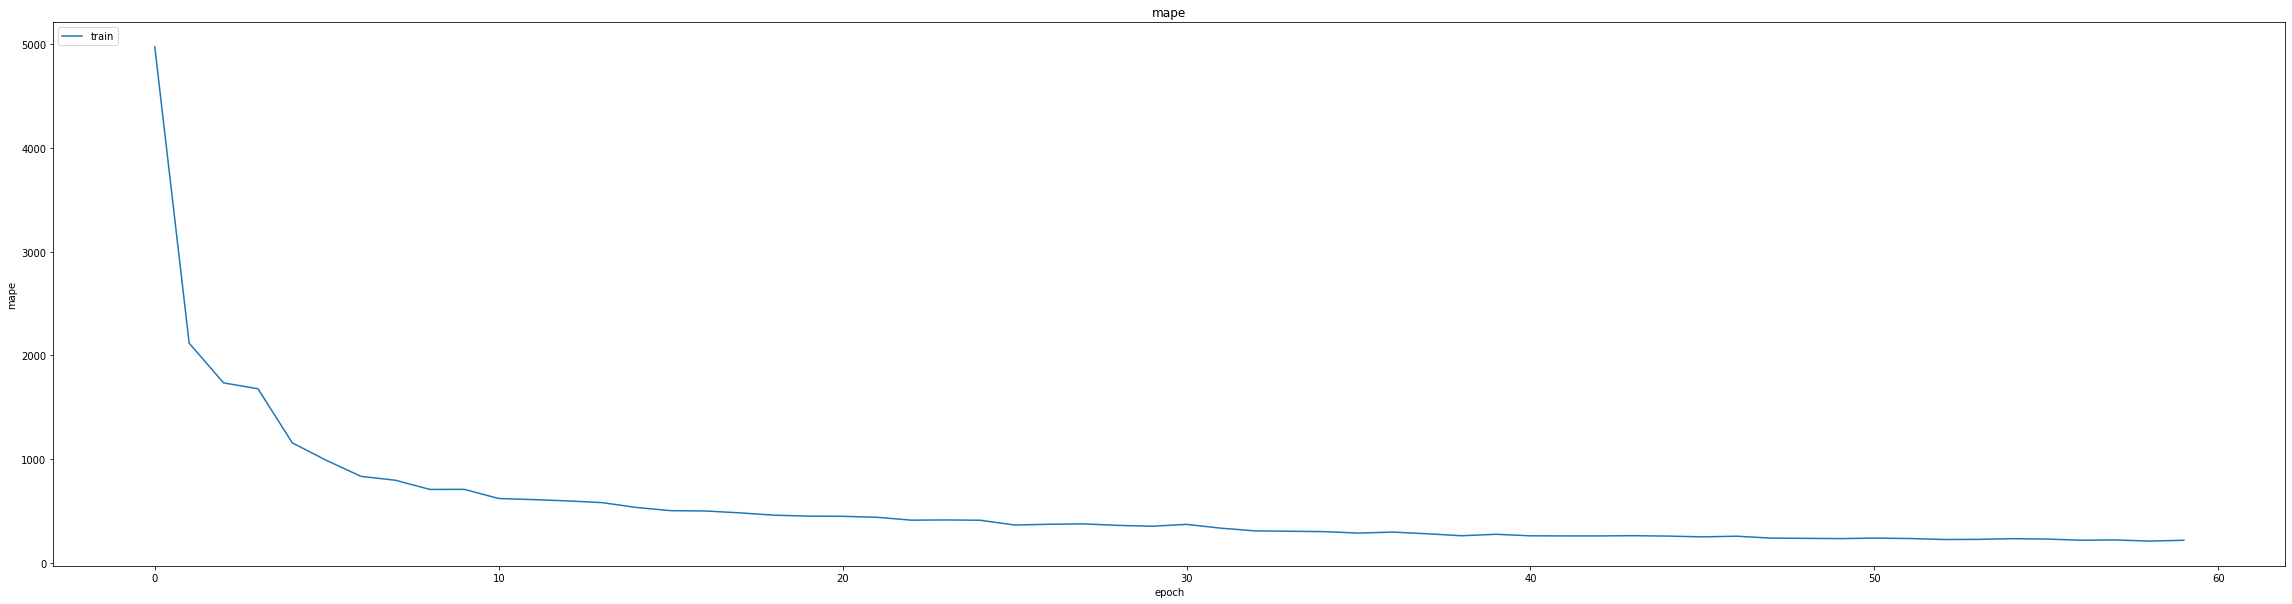

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:

print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.007384601980447769
0.01065154280513525
687/687 [==============================] - 32s 42ms/step
0.9951502946055527


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:

early_stopping = EarlyStopping(monitor='val_mse', patience=12)

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 1.5109e-04 - mae: 0.0050 - mse: 1.5109e-04 - root_mean_squared_error: 0.0123 - mape: 244.8815
Epoch 1: val_mse did not improve from 0.00011
463/463 [==============================] - 332s 708ms/step - loss: 1.5109e-04 - mae: 0.0050 - mse: 1.5109e-04 - root_mean_squared_error: 0.0123 - mape: 244.8815 - val_loss: 2.2332e-04 - val_mae: 0.0121 - val_mse: 2.2332e-04 - val_root_mean_squared_error: 0.0149 - val_mape: 2041.7804 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 1.3390e-05 - mae: 0.0027 - mse: 1.3390e-05 - root_mean_squared_error: 0.0037 - mape: 245.2679
Epoch 2: val_mse did not improve from 0.00011
463/463 [==============================] - 332s 718ms/step - loss: 1.3390e-05 - mae: 0.0027 - mse: 1.3390e-05 - root_mean_squared_error: 0.0037 - mape: 245.2679 - val_loss: 2.1716e-04 - val_mae: 0.0117 - val_mse: 2.1716e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 2179.7549

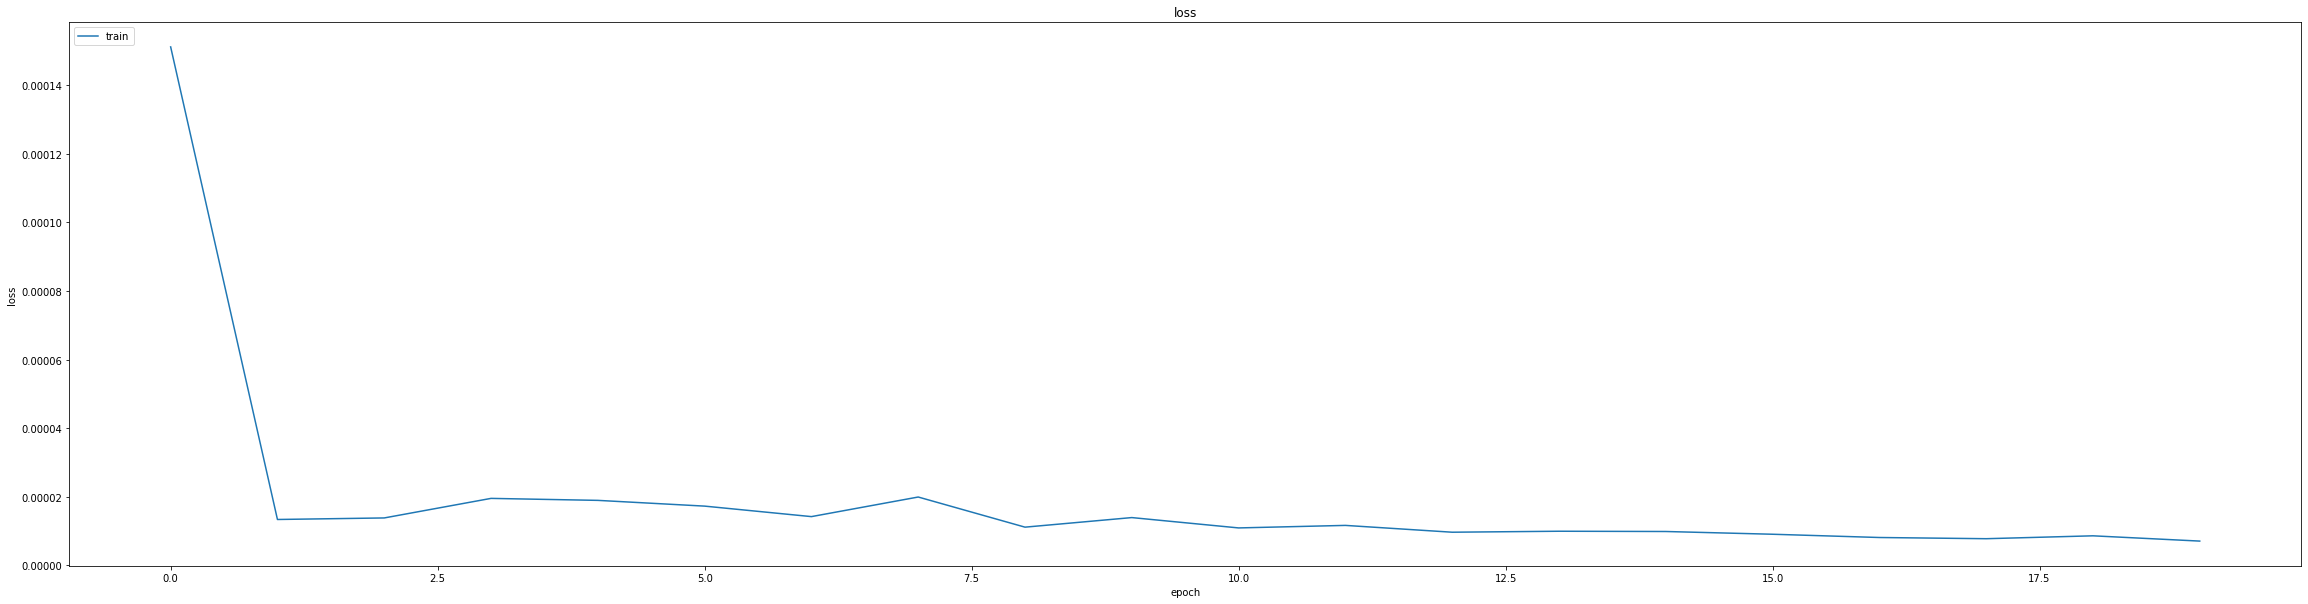

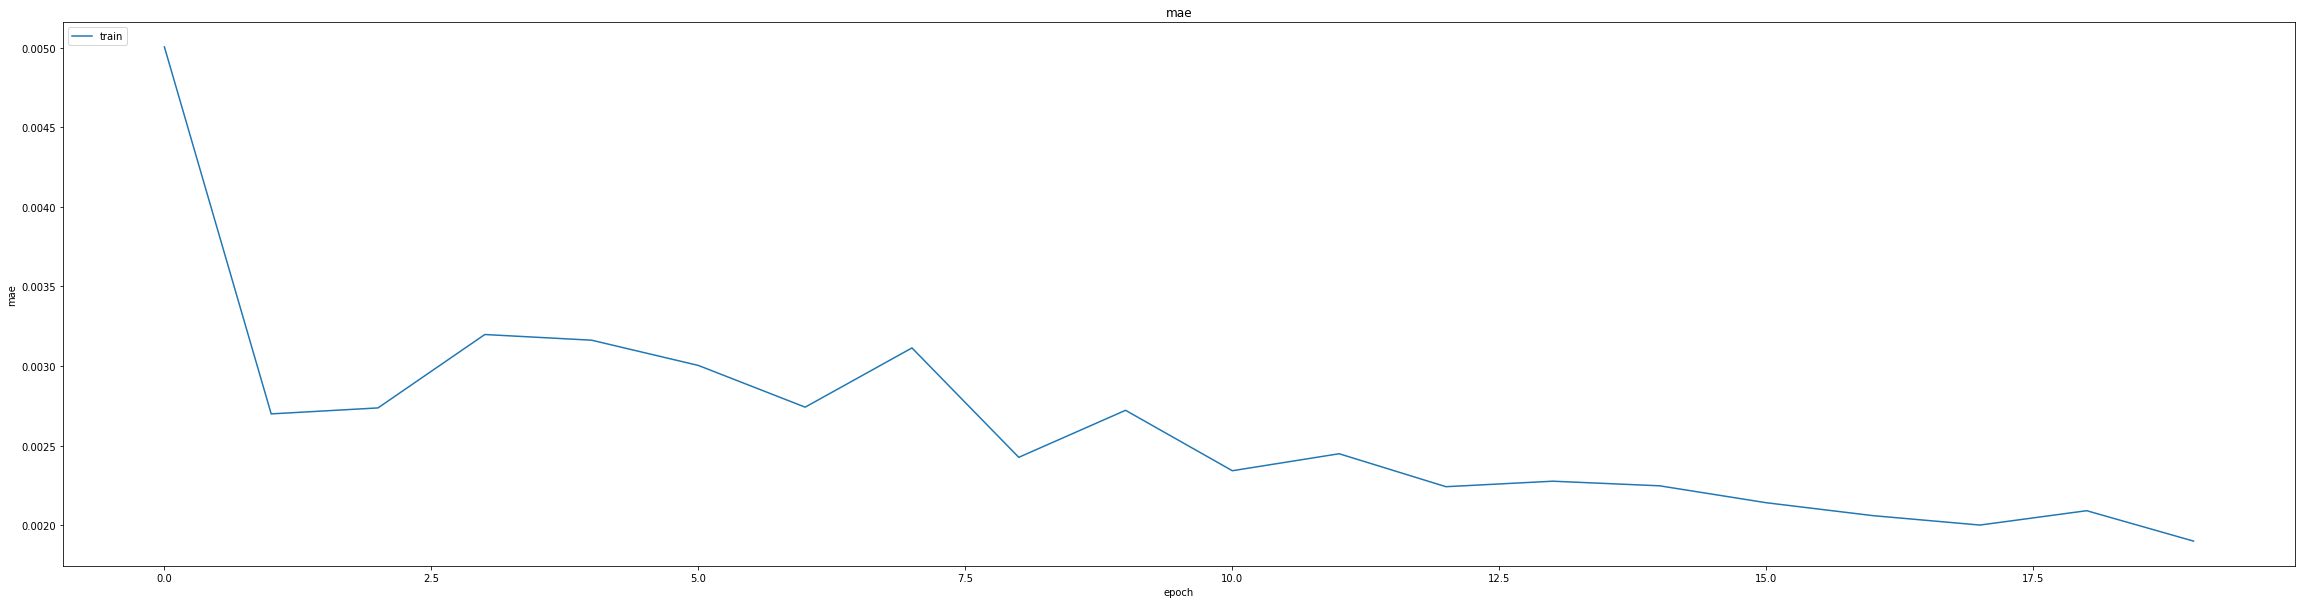

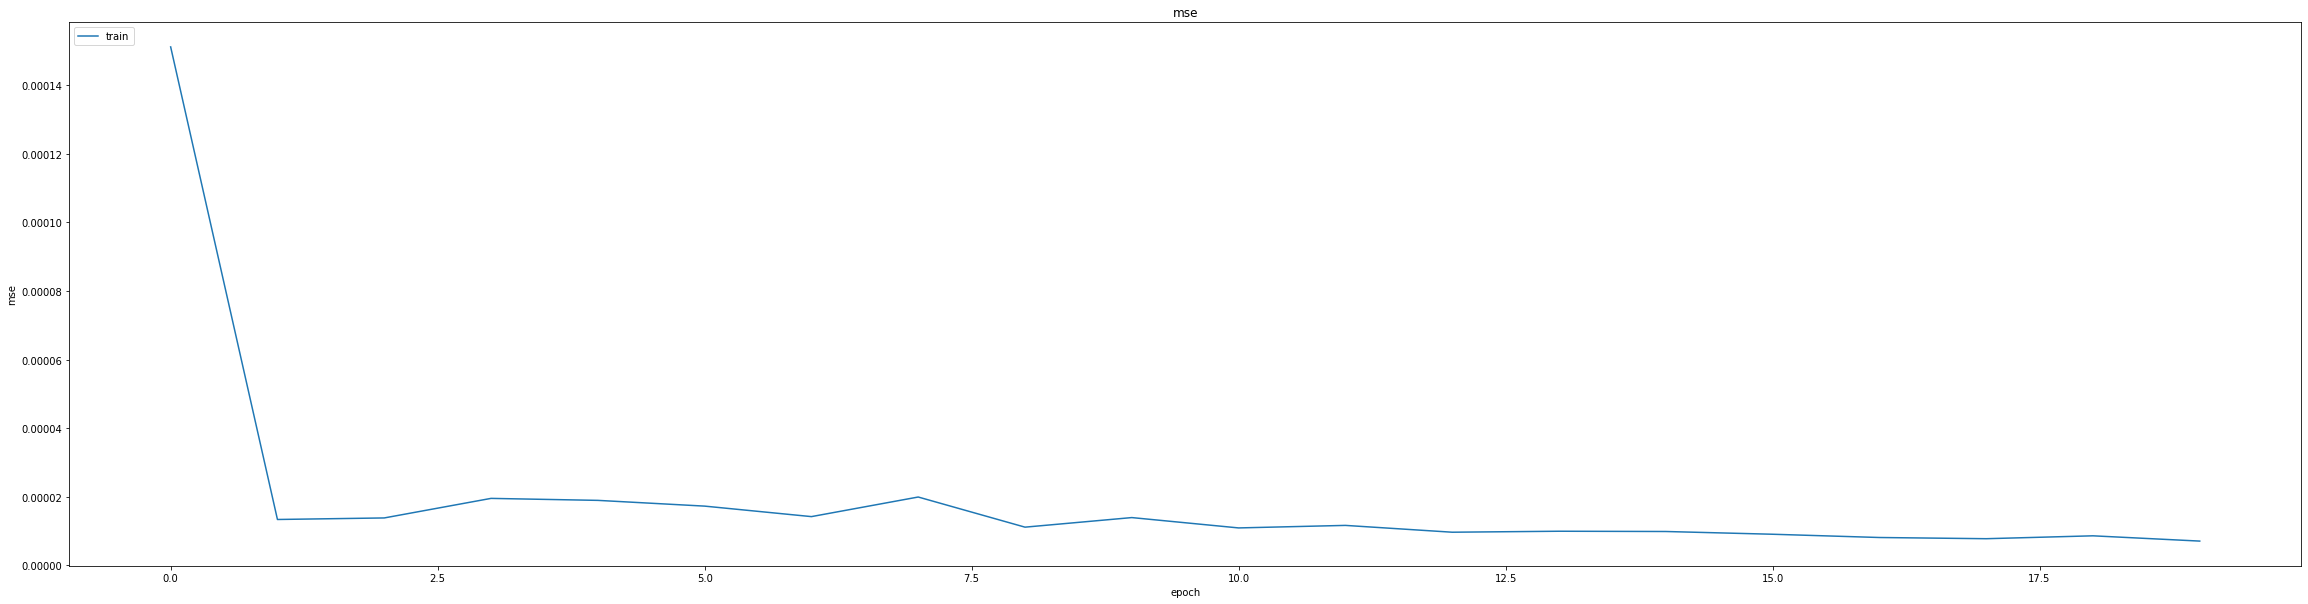

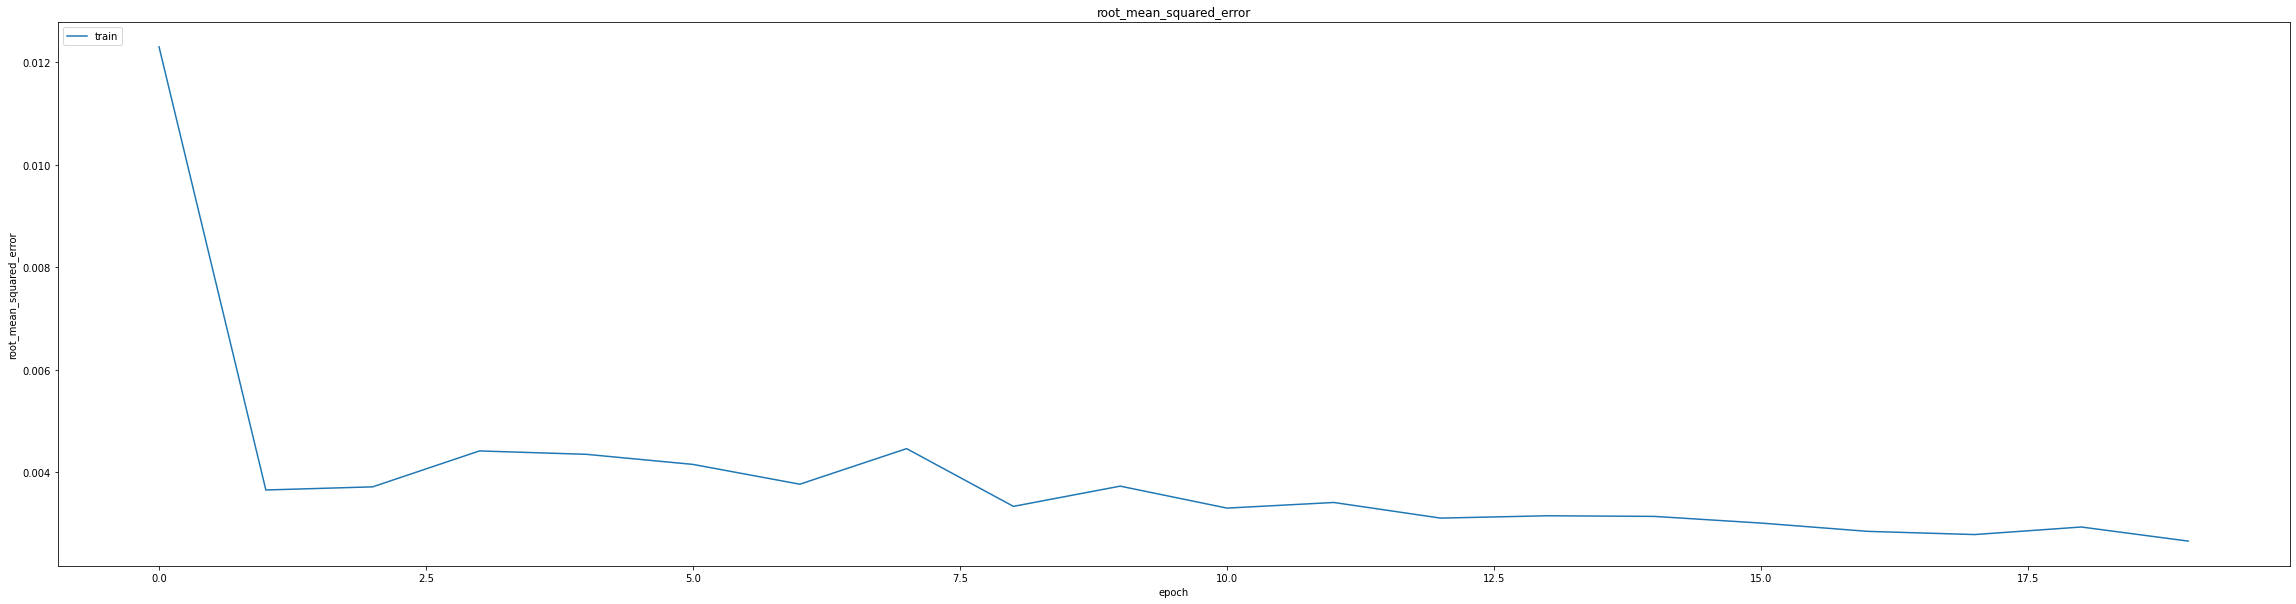

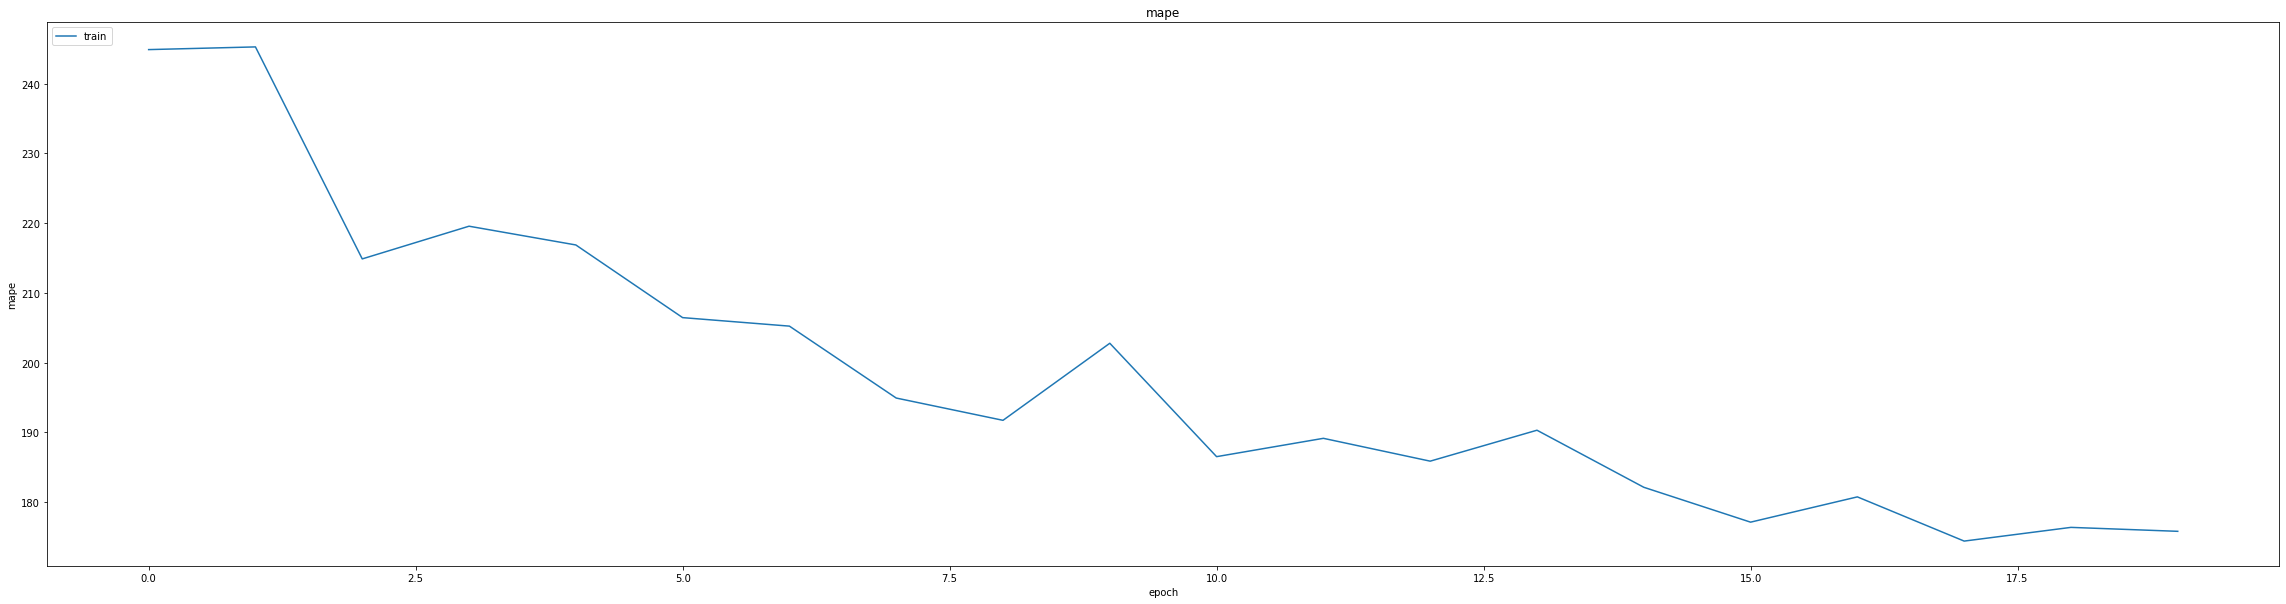

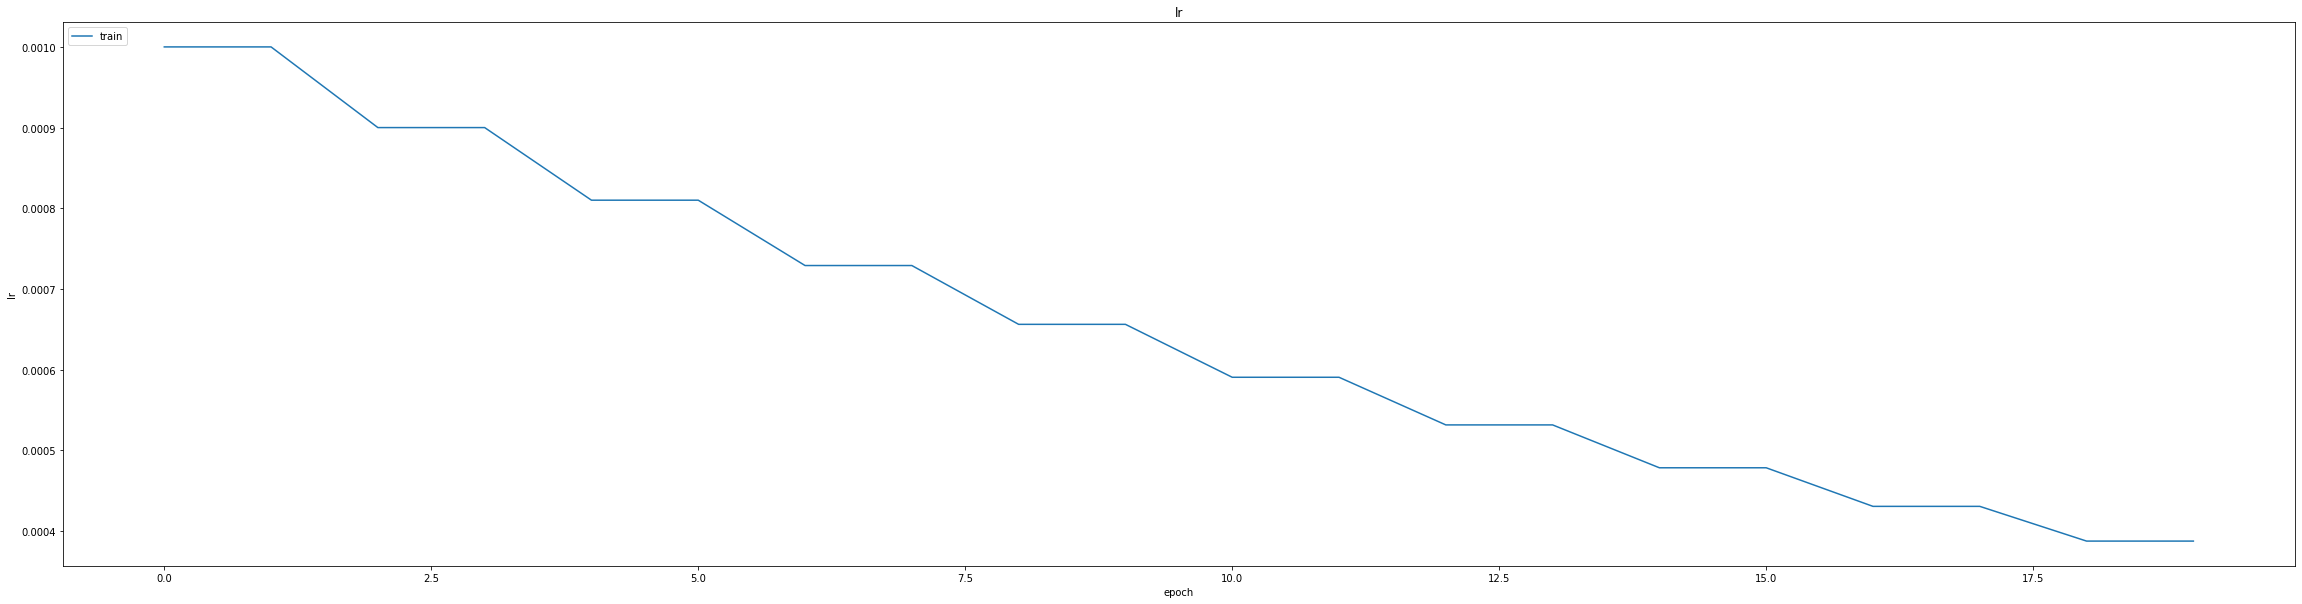

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:

print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.009191668592393398
0.012106761336326599
687/687 [==============================] - 29s 39ms/step
0.9951821945857702


In [ ]:
model.load_weights("weights.best.hdf5")

687/687 [==============================] - 30s 43ms/step


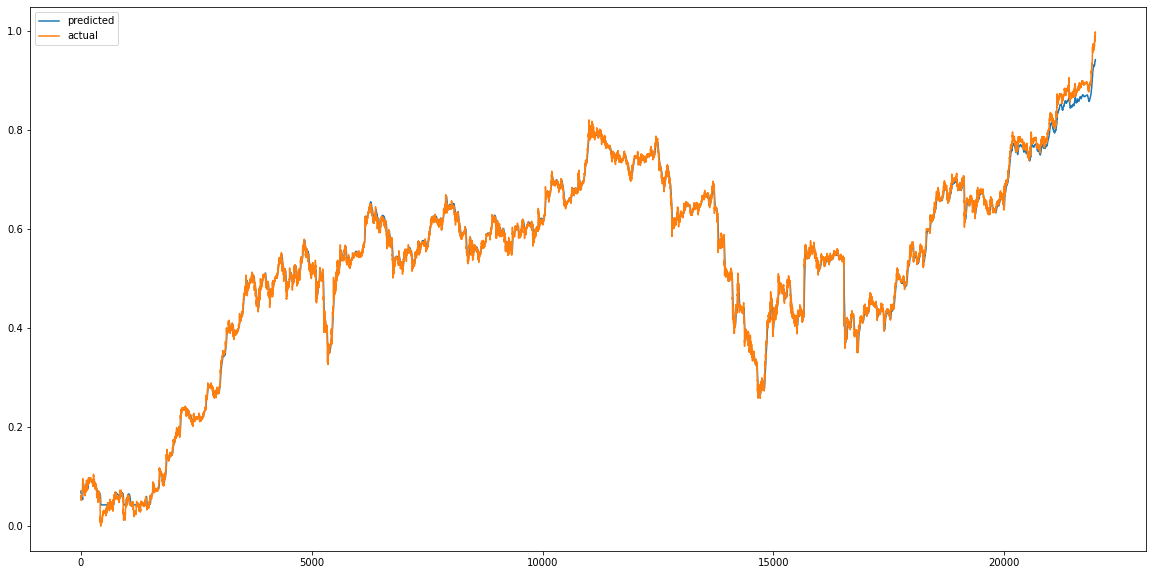

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


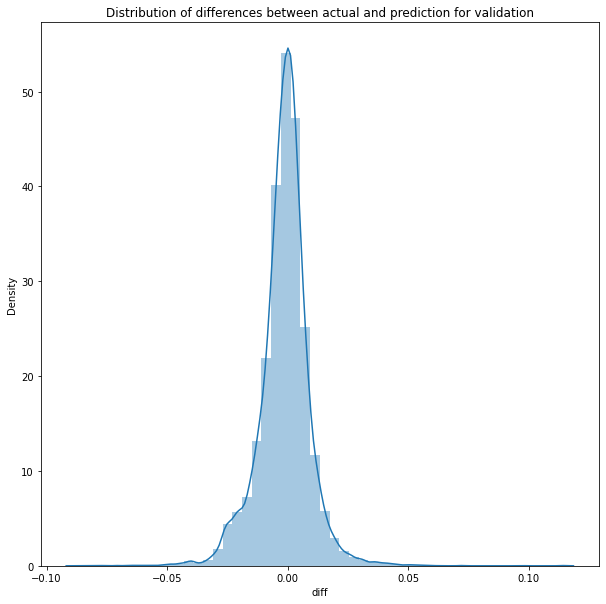

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 32s 46ms/step


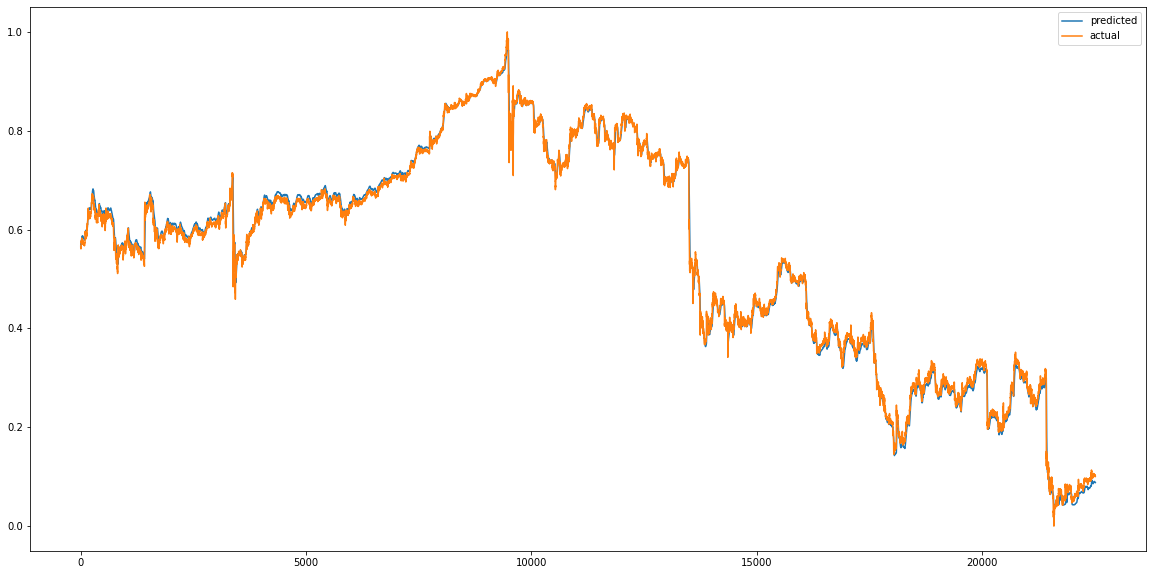

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


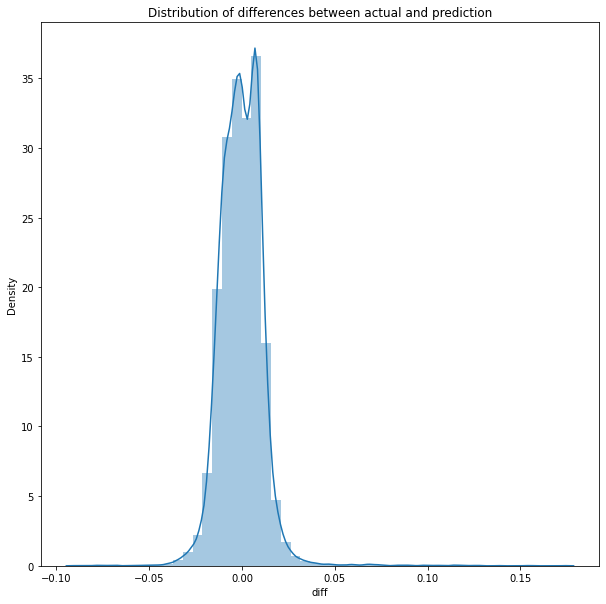

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.00013774142607683344
MAE :  0.008578872211459093
RMSE :  0.011736329327214426
704/704 [==============================] - 28s 40ms/step
R2_Score  : 0.9951821945857702


count    22523.000000
mean        -0.000341
std          0.011732
min         -0.089892
25%         -0.007863
50%         -0.000469
75%          0.006983
max          0.173854
Name: diff, dtype: float64